## Definition of complex
Definition of complex

1: a whole made up of complicated or interrelated parts.

2: group of obviously related units of which the degree and nature of the relationship is imperfectly known

Sometime around 2017 it was decided not to display on a game's main page its average User Rating if the game has fewer than 30 ratings (since a small number of user ratings can be so extremely variable).

It was later decided to nonetheless show the average rating if the game had been in the database for over a year and was still struggling to get 30 ratings.



# Factors that affect a game's weight include (by BGG) :
###### https://boardgamegeek.com/wiki/page/Weight
### "Weight" is not actually defined at BGG so different people have different ideas of what it means. Factors that affect games' weights are:
#### Amount of rules; 
#### Gameplay length;    
#### Amount of luck;      
#### Technical skill required (math, planning, reading, etc.);
#### Amount of choices available;
#### Amount of bookkeeping;
#### Level of difficulty  (!), this feature is redundant, I need to understand the level of difficulty

#### Amount of choices available it's to hard to compute, while it can be done for a specific game, considering a general approach it's too complex. In a game, I will need to define all the possible rules, setup and limitations of the game and then based on them create some sort of tree structure that represent the turns or all the possible choices that a player can take, but while it can be done for a specific game, generilizing the extraction of specific rules and the computation of this feature is too complex. (I will need perfect understandability of rules and set up in order to compute the amount of choices of a player)

# What I added to this BGG definition:
#### Readability indexes are used to give an idea of what types of technical skills and what level of schooling is required to Understand the rules and game mechanics;
#### Average play age (suggested);
#### Dependency on text while playing the game (like cards text);

# Learnability instead of complexity ?

#### Trying to compute learnability of a game instead of the complexity of the game can be usefull in real world application, in fact, there is always written the playtime on the board games boxes but never the time to learn to play the game.
#### In cases were the games are rented or for example in bars and pubs that let you rent these board games, for a group of friends knowing the time to learn the game can make a big different in the choice of which game to play.
#### Learnability is also easier to compute, in fact, you don't need to consider features like bookkeeping and amount of choices available in the game. The only problem is that BGG doesn't have recorded learnability labels but they might be extracted from other blogs or users comments on the first time they played the game.

# Predict games complexity:

## Creating Dataset

In [3]:
import pandas as pd
data = pd.read_csv('BoardGames.csv')
data # to display the first 5 lines of loaded data

,Name,Id,ruleBook
0,Gloomhaven,174430,gloomhaven-rulebook.pdf
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf
...,...,...,...
73,sumatra,313000,Sumatra_Rulebook-EN.pdf
74,everdell,199792,everdell_rules.pdf
75,monopoly-london,17250,27-monopoly-cthulhu-rulebook.pdf
76,feast-odin,177736,ODIN_EN_rules-LR.pdf


### Extract xml files

In [4]:
#Python code to illustrate parsing of XML files
# importing the required modules
import csv
import requests
import xml.etree.ElementTree as ET
  
for row in data.itertuples():
    name = row[1]
    id = row[2]    
    # url of rss feed
    url = 'https://api.geekdo.com/xmlapi/boardgame/' + str(id) + '?stats=1'
  
    # creating HTTP response object from given url
    resp = requests.get(url)
    xml_file = 'xml_files/'+name+'.xml'

    with open(xml_file, 'wb') as f:
            f.write(resp.content)
    f.close()

## Insert weight

In [5]:
weights = []
for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    tree = ET.parse(xml_file)
    root = tree.getroot()
    weights.append(root.findall(".//averageweight")[0].text) #xml parsing
    
data['weights'] = weights

In [6]:
data

,Name,Id,ruleBook,weights
0,Gloomhaven,174430,gloomhaven-rulebook.pdf,3.8807
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf,3.2
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf,2.6916
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf,2.8387
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf,1.9059
...,...,...,...,...
73,sumatra,313000,Sumatra_Rulebook-EN.pdf,1.875
74,everdell,199792,everdell_rules.pdf,2.8119
75,monopoly-london,17250,27-monopoly-cthulhu-rulebook.pdf,1.7826
76,feast-odin,177736,ODIN_EN_rules-LR.pdf,3.8418


## import pdfs (rulebooks)

In [7]:
import PyPDF2
from tqdm import tqdm 

rulebooks = {} #for each game a rulebook

dataStrip = data[['Name', 'ruleBook']]

#extracting text from pdfile:
for row in tqdm(dataStrip.itertuples()):
    rulebook = row[2]
    name = row[1]
    elToOpen = "dataset/" + rulebook
    pdfFileObj = open(elToOpen, 'rb')
 
    # creating a pdf reader object
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    text = []
    for i in range(0, pdfReader.numPages):
        pageObj = pdfReader.getPage(i)
        text.append(pageObj.extract_text()) #text = whole rulebook
    rulebooks[name] = text
    # closing the pdf file object
    pdfFileObj.close()

print(rulebooks['Gloomhaven'])

2it [00:06,  2.76s/it]C:\Program Files\Python310\lib\site-packages\PyPDF2\_reader.py:1355: PdfReadWarning: Xref table not zero-indexed. ID numbers for objects will be corrected.
  warnings.warn(
78it [01:53,  1.45s/it]

[' STOP! If you would prefer to watch a video \nexplanation of the rules, please visit \n\nwww.cephalofair.com/gaming-rules-overview', '1\n Rule Book\n\n\n\n\n18\n\n Character Miniatures\n\n\n\n\n47\n\n Monster Stat Sheets\n\n\n\n\n24\n\n Battle Goal Cards\n\n\n\n\n50\n\n Money Tokens\n\n\n\n\n\n1\n\n Scenario Book\n\n\n\n\n17\n\n Character Boards\n\n\n\n\n\n6\n Monster Stat Sleeves\n\n\n\n\n24\n\n Personal Quest Cards\n\n\n\n\n\n46\n\n Damage Tokens\n\n\n\n\n\n1\n\n Town Records Book\n\n\n\n\n504\n\n Character Ability Cards\n\n\n\n\n\n150\n\n Event Cards\n\n\n\n\n9\n\n Random Scenario Cards\n\n\n\n\n10\n\n Scenario Aid Tokens\n\n\n\n\n\n1\n\n Map Board\n\n\n\n\n457\n\n Attack Modifier Cards\n\n\n\n\n\n253\n\n Item Cards\n\n\n\n\n40\n\n Random Dungeon Cards\n\n\n\n\n4\n\n HP/XP Dials\n\n\n\n\n\n12\n\n Objective Tokens\n\n\n\n\n\n4\n\n Player Reference Cards\n\n\n\n\n\n30\n\n 2-Sided Map Tiles\n\n\n\n\n240\n\n Monster Standees\n\n\n\n\n\n6\n\n Wood Element Discs\n\n\n\n32 \n\nSummon Tok

In [8]:
example = rulebooks['sumatra']

In [9]:
#weights van presi con API, almeno provarci, se no riempio il dataset a mano. perchè magari non matchano i nomi

In [10]:
#1st step:
#provare a calcolare il numero di sillabe medio, vedere se eliminare junks o cosa.

In [11]:
import spacy
from tqdm import tqdm 
from nltk.tokenize import word_tokenize
import string
import re

In [12]:
#Splits the text into sentences
def break_sentences(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    return list(doc.sents)



#Returns the number of sentences
def sentence_count(text):
    return len(break_sentences(text))

#Returns average sentence length
def avg_sentence_length(text):
    words = word_count(text)
    sentences = sentence_count(text)
    average_sentence_length = float(words / sentences)
    return average_sentence_length

def list_to_string(s):
    return ' '.join([str(elem) for elem in s])

In [13]:
sentences = break_sentences(list_to_string(example))

In [14]:
#Splits the text into words and count them
number_pattern = "^\\d+$"

def word_count(text):
    count = 0
    words = word_tokenize(str(text))
    for token in words:
        token = str(token).strip(string.punctuation)
            #numbers do not make the text more difficult, they just bias the index to see numbers as easy words
            #I still want to keep words like hello45, maybe they refer to a specific race, mob or whatever in the Boardgame
            #numbers usually are inside tables or counting pages, not so much related to the readability.
        if str(token) not in string.punctuation and len(str(token)) != 0:
            if  re.match(number_pattern,str(token)) == None:
                count += 1
    return count

In [15]:
word_count(list_to_string(example))

3698

In [16]:
#avg_sentence_length(list_to_string(example))

## Extract random sentences from rulebooks.
## They can be used to create the dataset used for training an AI model to predict in which sentences we can infer some sort of luck mechanics.
### (May take a while, use it if you dont have already the dataset of random sentences and you want a place to start)
###########################################################################################################################

In [188]:
import random

random_sentences = []
for i in tqdm(data.Name):
    s = break_sentences(list_to_string(rulebooks[i]))
    for j in range(5):
        random_s = s[random.randrange(0, len(s))]
        random_sentences.append(random_s)
        
random_sentences

  0%|                                                                                           | 0/75 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [20]:
#this method append values, if you want to extract sentences make sure the file you are working with it's empty
import openpyxl 

file = "random_sentences.xlsx"

wb = openpyxl.load_workbook(file) 
sheet = wb.active 
  

c1 = sheet.cell(row = 1, column = 1)
    # writing values to cells 
c1.value = "sample_sentence"

c2 = sheet.cell(row = 1, column = 2)
    # writing values to cells 
c2.value = "randomness"

for i in range(2, len(random_sentences)): #the senteces 0,1 are excluded, not a big deal
    c1 = sheet.cell(row = i, column = 1)
    # writing values to cells 
    try: 
        c1.value = str(random_sentences[i])
    except:
        print(random_sentences[i])
wb.save(file)

NameError: name 'random_sentences' is not defined

############################################################################################################################

# Counting syllables

In [43]:
import pronouncing
p_list = pronouncing.phones_for_word("Randall")
pronouncing.syllable_count(p_list[0])

2

In [44]:
import string
import re



def syllables_count(word):
    p_list = pronouncing.phones_for_word(word)
    try:
        return pronouncing.syllable_count(p_list[0])
    except:
        return 0
     

def syllables_count_text(text):
    tot_syllables = 0
    words = word_tokenize(str(text))
    for w in words:
        if str(w) not in string.punctuation and len(str(w)) != 0:
                #a board games is not complex if it has many numbers, but if it has complex rules!
            if  re.match(number_pattern,str(w)) == None: #delete numbers because usually there are tables full of them or a the start of chapters
                w = str(w).strip(string.punctuation)
                #print(str(w), syllables_count(str(w)))
                tot_syllables += syllables_count(str(w))
    return tot_syllables

def avg_syllables_word(text):
    return syllables_count_text(text) / word_count(text)

In [45]:
#syllables_count_text("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall")

In [46]:
#avg_syllables_word("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall")

In [47]:
# difficult words are those with syllables >= 2
# if we are counting  DaleChall, complex words are the one in not in the wordlist

In [48]:
#difficult words, not DaleChall

#Count the "complex" words consisting of three or more syllables. Do not include proper nouns,
#familiar jargon, or compound words. Do not include common suffixes (such as -es, -ed, or -ing) as a syllable;
from nltk.corpus import stopwords 
import nltk

tags_to_reduce = ['VBZ', 'VBP', 'VBN', 'VBG', 'VBD']

def difficult_words(text, threshold_syllables = 3):
     
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    # Find all words in the text
    count = 0
    s_words = word_tokenize(str(text))
    for w in s_words:
        if w not in string.punctuation:
            w = str(w).strip(string.punctuation)
            syllable_count = syllables_count(w)
            tag = nltk.pos_tag([w])[0][1] #take the tag, use it to not count proper nouns
            if tag in tags_to_reduce:
                syllable_count = syllable_count - 1 # (such as -es, -ed, or -ing)
            if syllable_count >= threshold_syllables and w not in set(stopwords.words('english')) and tag != 'NNP':
                count += 1
    return count

In [49]:
difficult_words("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall",2)

4

In [50]:
#difficult_words("Todd, thanks for connecting on LinkedIn. I have an IT opportunity that fits what you’re looking for. Would you like to set up a call? – Randall",3)

# Flesch reading ease

In [51]:
  """
        Implements Flesch Formula:
        Reading Ease score = 206.835 - (1.015 × ASL) - (84.6 × ASW)
        Here,
          ASL = average sentence length (number of words
                divided by number of sentences)
          ASW = average word length in syllables (number of syllables
                divided by number of words)
    """
#• Scores between 90.0 and 100.0 are considered easily understandable by an average 5th grader.
#• Scores between 60.0 and 70.0 are considered easily understood by 8th and 9th graders.
#• Scores between 0.0 and 30.0 are considered easily understood by college graduates.

def flesch_reading_ease(text):
    RE = 206.835 - float(1.015 * avg_sentence_length(text)) -\
          float(84.6 * avg_syllables_word(text))
    return round(RE,2)


In [52]:
#flesch_reading_ease(list_to_string(example))

# Gunning Fog formula

In [53]:
def gunning_fog(text, difficult_words_threshold = 3):
    per_diff_words = 100 * (difficult_words(text, difficult_words_threshold) / word_count(text))
    grade = 0.4 * (avg_sentence_length(text) + per_diff_words)
    return round(grade, 2)

In [54]:
#gunning_fog(list_to_string(example), 3)

# SMOG formula

In [55]:
#SMOG FORMULA

#calculated on a sample of 30 sentences
#SMOG grading = 3 + (polysyllable count)^1/2.

'''
0-2	4th Grade	Very easy to read
3-6	5th Grade	Very easy to read
7-12	6th Grade	Easy to read
13-20	7th Grade	Fairly easy to read
21-42	8th & 9th Grade	Conversational English
43-56	10th Grade	Fairly difficult to read
57-72	11th Grade	Fairly difficult to read
73-90	12th Grade	Fairly difficult to read
91-110	College Freshman	Difficult to read
111-132	College Sophomore	Difficult to read
133-156	College Junior	Difficult to read
157-182	College Senior	Difficult to read
183-210	College Graduate	Very difficult to read
211+	Professional	Extremely difficult to read

As a general guide, it is a good idea to aim for a reading level 
equivalent to 6th to 8th graders, as this is what the average American can most easily comprehend.
Anything higher than that would be somewhat challenging to read.
'''

'\n0-2\t4th Grade\tVery easy to read\n3-6\t5th Grade\tVery easy to read\n7-12\t6th Grade\tEasy to read\n13-20\t7th Grade\tFairly easy to read\n21-42\t8th & 9th Grade\tConversational English\n43-56\t10th Grade\tFairly difficult to read\n57-72\t11th Grade\tFairly difficult to read\n73-90\t12th Grade\tFairly difficult to read\n91-110\tCollege Freshman\tDifficult to read\n111-132\tCollege Sophomore\tDifficult to read\n133-156\tCollege Junior\tDifficult to read\n157-182\tCollege Senior\tDifficult to read\n183-210\tCollege Graduate\tVery difficult to read\n211+\tProfessional\tExtremely difficult to read\n\nAs a general guide, it is a good idea to aim for a reading level \nequivalent to 6th to 8th graders, as this is what the average American can most easily comprehend.\nAnything higher than that would be somewhat challenging to read.\n'

In [56]:
import random

#taking a sample of 30 sentences
def Smog_formula(text):
    sample = []
    i = 0
    sentences = break_sentences(text)
    count = sentence_count(text)
    while i < 30:
        sample.append(sentences[random.randrange(0, count)])
        i += 1
    hard_w = difficult_words(list_to_string(sample))
    return round(3 + (hard_w **0.5),2)

In [57]:
#Smog_formula(list_to_string(example))

# Dale Chall readability score

In [58]:
DL_list = []
my_file = open('DaleChallEasyWordList.txt', 'r')
DL_list_ten = my_file.read()
DL_list_ten = list_to_string(DL_list_ten).split("\n")

for i in DL_list_ten:
    DL_list.append(i.replace(" ", ""))

DL_list

['a',
 'able',
 'aboard',
 'about',
 'above',
 'absent',
 'accept',
 'accident',
 'account',
 'ache',
 'aching',
 'acorn',
 'acre',
 'across',
 'act',
 'acts',
 'add',
 'address',
 'admire',
 'adventure',
 'afar',
 'afraid',
 'after',
 'afternoon',
 'afterward',
 'afterwards',
 'again',
 'against',
 'age',
 'aged',
 'ago',
 'agree',
 'ah',
 'ahead',
 'aid',
 'aim',
 'air',
 'airfield',
 'airplane',
 'airport',
 'airship',
 'airy',
 'alarm',
 'alike',
 'alive',
 'all',
 'alley',
 'alligator',
 'allow',
 'almost',
 'alone',
 'along',
 'aloud',
 'already',
 'also',
 'always',
 'am',
 'America',
 'American',
 'among',
 'amount',
 'an',
 'and',
 'angel',
 'anger',
 'angry',
 'animal',
 'another',
 'answer',
 'ant',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apart',
 'apartment',
 'ape',
 'apiece',
 'appear',
 'apple',
 'April',
 'apron',
 'are',
 "aren't",
 'arise',
 'arithmetic',
 'arm',
 'armful',
 'army',
 'arose',
 'around',
 'arrange',
 'arrive',
 

In [59]:
def complex_words_DL(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    # Find all words in the text
    count = 0
    sentences = break_sentences(text)
    for sentence in tqdm(sentences):
        s_words = word_tokenize(str(sentence))
        for w in s_words:
            if w not in DL_list:
                count += 1
    return count

In [60]:
#complex_words_DL(list_to_string(example))

In [61]:
#word_count(list_to_string(example))

In [62]:
def dale_chall_readability_score(text):
    """
        Implements Dale Challe Formula:
        Raw score = 0.1579*(PDW) + 0.0496*(ASL) + 3.6365
        Here,
            PDW = Percentage of difficult words.
            ASL = Average sentence length
            
4.9 or lower	easily understood by an average 4th-grade student or lower
5.0–5.9	easily understood by an average 5th or 6th-grade student
6.0–6.9	easily understood by an average 7th or 8th-grade student
7.0–7.9	easily understood by an average 9th or 10th-grade student
8.0–8.9	easily understood by an average 11th or 12th-grade student
9.0–9.9	easily understood by an average 13th to 15th-grade (college) student

    """
    words = word_count(text)
    if words > 0:
        # Percentage of words not on difficult word list
        
        #I should write here complex_words_DL(text)
        #but the word_list is too simple and keeps into consideration on basic words and basic forms 
        #so it's more usefull to use the function difficult_words that keeps the words to be hard with >= 3 syllables
        diff_words = (float( difficult_words(text)) / float(words)) * 100 
 
    raw_score = (0.1579 * diff_words) + \
                (0.0496 * avg_sentence_length(text))
     
    # If Percentage of Difficult Words is greater than 5 %, then;
    # Adjusted Score = Raw Score + 3.6365,
    # otherwise Adjusted Score = Raw Score
 
    if diff_words > 5:      
 
        raw_score += 3.6365
         
    return round(raw_score,2)

In [63]:
#dale_chall_readability_score(list_to_string(example))

# Powers-Sumner-Kear Readability Formula;

In [64]:
'''
RA = 0.0778(ASL) + 0.0455(NS) + 2.7971

Where,
RA = Reading Age
ASL = Average Sentence Length
NS = Number of Syllables

need to be computed on a passage of 100 words
'''
#passage of l words
def samplePassage(text, l):
    wc = word_count(text)
    result = []
    total_words = []
    words = word_tokenize(str(text))
    for token in words:
        token = str(token).strip(string.punctuation)
        if token not in string.punctuation and len(token) != 0:
            total_words.append(token)
    
    #random l words
    starting_index = random.randrange(0, wc-l)
    result = total_words[starting_index: starting_index+l] 
    return result

In [65]:
def PSK_readability(text):
    sample = list_to_string(samplePassage(text, 100))
    ASL = 100 /sentence_count(sample)
    NS = avg_syllables_word(sample) * 100
    RA = 0.0778*ASL + 0.0455*NS + 2.7971
    return round(RA, 2)

In [66]:
PSK_readability(list_to_string(example))

10.57

# FORCAST readability formula

In [67]:
'''
Grade level = 20 − (N / 10)

Where N = number of single-syllable words in a 150-word sample
'''

'\nGrade level = 20 − (N / 10)\n\nWhere N = number of single-syllable words in a 150-word sample\n'

In [68]:
def Forcast_readability(text):
    sample = list_to_string(samplePassage(text, 150))
    complex_words = difficult_words(sample, 2)
    N = 150 - complex_words
    return round(20 - (N/10), 2)

In [69]:
Forcast_readability(list_to_string(example))

7.9

# Use this part of code only for the newly added elements in the dataset, without computing all the features for all the elements

 #################################################################################################################

### make sure you have ran the code for the definition of the indixes and the code for the upload of the PDFs (this code is located from the start of the jupyter notebook until this specific cell)

In [ ]:
#insert the name of the elements newly added to the dataset
newly_added = ['feast-odin', 'terraforming-mars'] 

In [ ]:
features = {}
for i in tqdm(newly_added):
    feature_el = []
    feature_el.append(Forcast_readability(list_to_string(rulebooks[i])))
    feature_el.append(Smog_formula(list_to_string(rulebooks[i])))
    feature_el.append(flesch_reading_ease(list_to_string(rulebooks[i])))
    feature_el.append(PSK_readability(list_to_string(rulebooks[i])))
    feature_el.append(dale_chall_readability_score(list_to_string(rulebooks[i])))
    feature_el.append(gunning_fog(list_to_string(rulebooks[i])))
    features[i] = feature_el
  

In [191]:
for i in newly_added: #iterate on keys
    features[i].append(sentence_count(list_to_string(rulebooks[i])))

In [192]:
features

{'feast-odin': [7.9, 8.1, 152.14, 269.5, 5.46, 9.43, 708],
 'terraforming-mars': [8.9, 9.93, 136.58, 260.27, 6.03, 10.42, 532]}

# Save the new computed features of the new elements so I can add them to the text file of the overall features (remember to manually copy and paste the features from the features_newlyAdded.txt of the new added elements to the features.txt of the overall features)

### Save features (only new adds)

In [85]:
file_newAdds = 'features_newlyAdded.txt'

import json
dict_f = features
with open(file_newAdds,"w") as file:
    file.write(json.dumps(dict_f))

############################################################################################################################

## Use this extraction code if you need to extract features from ALL the rulebooks 

## Extracting features, specifically extracting readability indices (may take a while)

In [148]:
features = {}
for i in tqdm(rulebooks): #iterate on keys
    feature_el = []
    feature_el.append(Forcast_readability(list_to_string(rulebooks[i])))
    feature_el.append(Smog_formula(list_to_string(rulebooks[i])))
    feature_el.append(flesch_reading_ease(list_to_string(rulebooks[i])))
    feature_el.append(PSK_readability(list_to_string(rulebooks[i])))
    feature_el.append(dale_chall_readability_score(list_to_string(rulebooks[i])))
    feature_el.append(gunning_fog(list_to_string(rulebooks[i])))
    features[i] = feature_el
    
features

100%|████████████████████████████████████████████████████████████████████████████| 2118/2118 [00:00<00:00, 6391.29it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1964/1964 [00:00<00:00, 6485.71it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1249/1249 [00:00<00:00, 6009.05it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 6720.67it/s]


100%|████████████████████████████████████████████████████████████████████████████| 2053/2053 [00:00<00:00, 6558.75it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1068/1068 [00:00<00:00, 6511.56it/s]


100%|████████████████████████████████████████████████████████████████████████████| 1834/1834 [00:00<00:00, 5973.90it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 546/546 [00:00<00:00, 6449.34it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 655/655 [00:00<00:00, 6754.01it/s]


{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27],
 'commands-colors-ancients': [9.0, 10.94, 60.67, 12.29, 6.13, 12.35],
 'conquerors-alexander-great': [8.1, 9.24, 76.19, 14.33, 5.7, 9.04],
 'dominant-species-card-game': [10.0, 10.21, 67.53, 9.98, 6.14, 12.06],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27],
 'barbarossa-kiev-rostov-1941': [9.7, 10.35, 68.04, 14.59, 5.95, 10.17],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15],
 'fading-glory': [10.0, 9.56, 68.14, 13.42, 5.93, 10.69],
 'old-school-tactical-volume-1-fighting-eastern-fron': [9.0,
  7.9,
  76.82,
  17.25,
  5.48,
  8.45],
 'formula-motor-racing': [9.2, 9.0, 79.59, 17.27, 5.4, 9.03],
 'glory-iii': [9.5, 9.63, 6

### Extracting number of sentences

In [240]:
for i in tqdm(rulebooks): #iterate on keys
    features[i].append(sentence_count(list_to_string(rulebooks[i])))

In [243]:
features

{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27,
  1063],
 'commands-colors-ancients': [9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257],
 'conquerors-alexander-great': [8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139],
 'dominant-species-card-game': [10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27,
  1536],
 'barbarossa-kiev-rostov-1941': [9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15,
  899],
 'fading-glory': [10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555],
 'old-school-tactical-volume-1-fighting-eastern-fron': [9.0,
  7.9,
  76.82,
  17.25,
  5.48,
  8.45,
  1198],
 'formula-moto

# Extracting amount of luck

### train the models based on a simple dataset that I created

In [108]:
import pandas as pd
data_sentences = pd.read_csv('random_sentences.csv')

In [109]:
data_sentences

,sample_sentence,randomness
0,The number is subtracted from the die roll whe...,1
1,If a different party plays the game with \ndif...,0
2,When combined with the adjective title on the ...,0
3,Dealer shuffles Battle Deck and puts it face down,1
4,"Unfortunately, the \nlight is accompanied ...",0
...,...,...
116,In games where players have the same \n \n num...,0
117,Card Adjustments: Certain event cards may modi...,1
118,5.0 The Mongols .................................,0
119,A foot missile unit may fire only at the end o...,0


In [110]:
import numpy as np
from sklearn.model_selection import train_test_split
X_init = []
for i in data_sentences.sample_sentence:
    X_init.append(i)

### Preprocessing

In [111]:
y = data_sentences.randomness

X_train_text, X_test_text, y_train, y_test = train_test_split(X_init, y, test_size=0.33)

In [112]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_text+X_test_text)

X_train = tokenizer.texts_to_sequences(X_train_text)
X_test  = tokenizer.texts_to_sequences(X_test_text)

In [113]:
from keras_preprocessing.sequence import pad_sequences

max_tokens=50

X_train = pad_sequences(X_train, maxlen=max_tokens, padding="post", truncating="post", value=0)
X_test  = pad_sequences(X_test , maxlen=max_tokens, padding="post", truncating="post", value=0)

X_train.shape, X_test.shape

((81, 50), (40, 50))

### K_means

In [114]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [115]:
import sklearn.metrics as sm

sm.accuracy_score(y_test, y_pred)

0.5

In [116]:
sm.precision_score(y_test, y_pred)

0.43478260869565216

In [117]:
sm.recall_score(y_test, y_pred)

0.5882352941176471

### KNN

In [118]:
from sklearn.neighbors import KNeighborsClassifier

In [119]:
knn = KNeighborsClassifier(n_neighbors = 4)
model = knn.fit(X_train, y_train)

In [120]:
y_pred = knn.predict(X_test)

In [121]:
sm.accuracy_score(y_test, y_pred)

0.575

In [122]:
sm.precision_score(y_test, y_pred)

0.5

In [123]:
sm.recall_score(y_test, y_pred)

0.17647058823529413

### Decision tree

In [124]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model = dt.fit(X_train, y_train)

In [125]:
y_pred = dt.predict(X_test)

In [126]:
sm.accuracy_score(y_test, y_pred)

0.5

In [127]:
sm.precision_score(y_test, y_pred)

0.42105263157894735

In [128]:
sm.recall_score(y_test, y_pred)

0.47058823529411764

[Text(0.5555555555555556, 0.9285714285714286, 'X[0] <= 128.5\ngini = 0.472\nsamples = 81\nvalue = [50, 31]'),
 Text(0.3333333333333333, 0.7857142857142857, 'X[8] <= 7.5\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2222222222222222, 0.6428571428571429, 'X[30] <= 62.5\ngini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.16666666666666666, 0.5, 'X[2] <= 0.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.1111111111111111, 0.35714285714285715, 'X[1] <= 78.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05555555555555555, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.16666666666666666, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2222222222222222, 0.35714285714285715, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.2777777777777778, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.4444444444444444, 0.6428571428571429, 'X[30] <= 129.5\ngini = 0.43\nsamples = 32\nvalue = [10, 22]'),
 Text(0.388

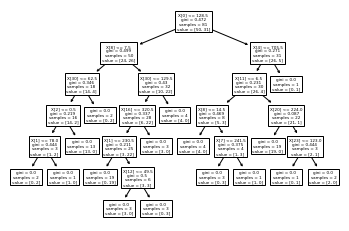

In [129]:
from sklearn import tree
tree.plot_tree(model)

### I'm more intrested in the recall since I would like to retrieve all the sentences related to randomness, recall seems ok, this should be the right path, also I might use LSTMs but I do not have many data and I would lose a lot of time extracting random sentences and label them so I will try with decision trees, specifically with random forest, this method it's an ensemble model that should give more stability with the results

In [131]:
from sklearn.ensemble import RandomForestClassifier

final_model = RandomForestClassifier(n_estimators=27)  
r = 0
p = 0
while r <= 0.36:
    rfc = RandomForestClassifier(n_estimators=27)  
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    r = sm.recall_score(y_test, y_pred)
    final_model = rfc

In [132]:
sm.recall_score(y_test, y_pred)

0.4117647058823529

In [133]:
sm.precision_score(y_test, y_pred)

0.4375

In [134]:
sm.accuracy_score(y_test, y_pred)

0.525

In [135]:
final_model

RandomForestClassifier(n_estimators=27)

In [136]:
y_pred, np.array(y_test)

(array([0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64),
 array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64))

# Save and load best RFC previously computed

In [137]:
import pickle

#### Save model
##############################################################################################################################

In [222]:
#Save model
filename = 'finalized_model_luck_prediction.sav'
pickle.dump(final_model, open(filename, 'wb'))

###############################################################################################################################

#### Load model

In [138]:
# load the model from disk
filename = 'finalized_model_luck_prediction.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)

In [139]:
import sklearn.metrics as sm

y_pred = loaded_model.predict(X_test)
print(sm.precision_score(y_test, y_pred))
print(sm.recall_score(y_test, y_pred))

0.8333333333333334
0.5882352941176471


### The model performs good on the data that I provided, but if I try it on a rulebook, the results are not the best
### With such and high recall I obtain many false positives, while I can't do much with False negatives, I can try to filter out false positives by findind keywords inside these sentences that resemble randomness

In [140]:
data

,Name,Id,ruleBook,weights
0,Gloomhaven,174430,gloomhaven-rulebook.pdf,3.8807
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf,3.2
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf,2.6916
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf,2.8387
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf,1.9059
...,...,...,...,...
73,sumatra,313000,Sumatra_Rulebook-EN.pdf,1.875
74,everdell,199792,everdell_rules.pdf,2.8119
75,monopoly-london,17250,27-monopoly-cthulhu-rulebook.pdf,1.7826
76,feast-odin,177736,ODIN_EN_rules-LR.pdf,3.8418


In [141]:
s = break_sentences(list_to_string(rulebooks['sumatra']))

In [142]:
s_converted = [str(x) for x in s]

In [128]:
max_tokens=50
X_toTrain = tokenizer.texts_to_sequences(s_converted)
X = pad_sequences(X_toTrain, maxlen=max_tokens, padding="post", truncating="post", value=0)

X.shape

(187, 50)

In [129]:
count_rnd_sentences = 0
n=0
for i in X:
    if loaded_model.predict(X[n].reshape(1,-1))[0] == 1:
        count_rnd_sentences += 1
    n+=1
    
count_rnd_sentences #how many are false positives?

88

### Randomness in boardGames is defined principally by shuffling/drawing cards, rolling dice and random events that happen while playing, or because of a particular map setup.
### I can try to reduce the number of FP by trying to filter out sentences that do not refer strictly to these events

### Since I already used an AI model to filter sentences, I can search for specific words inside the sentences to define if they are FP or FN, doing this procedure without firstly applying an AI model would mean to have too many coincidences like: die can refer to 2 different things, rolling a die or die in the game.

In [143]:
randomness_words_list = ['haphazardness', 'fickleness', 'volatility', 'changeability', 'impermanence', 'randomness', 'die', 'dice', 'shuffle','draw', 'roll']
#if there is one of these words in the sentence it means that the game is somehow
#related to cards, shuffling cards, or rolling dice, and that's the main components of luck in boardgames

In [144]:
#lemmatization (find root of words)
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [145]:
def check_against_randomness_list(sentence):
    for i in sentence:
        if lemmatizer.lemmatize(str(i)) in randomness_words_list: #search the lemma if it's inside the randomness word list
            return 1 #related to randomness (hopefully)
    return 0 #not related to randomness (hopefully)

In [146]:
def from_vector_to_sentence(embedding):
    word_index_keys = [x for x in tokenizer.word_index]
    result = []
    for x in embedding:
        if x != 0:
            result.append(word_index_keys[x - 1])
    return result

In [147]:
#try again now with the lemmatization control
def count_randomness_sentences(rulebook):
    #curious = []
    s = break_sentences(rulebook)
    s_converted = [str(x) for x in s]
    max_tokens=50
    X_toTrain = tokenizer.texts_to_sequences(s_converted)
    X = pad_sequences(X_toTrain, maxlen=max_tokens, padding="post", truncating="post", value=0)
 
    count_rnd_sentences = 0
    n=0
    for i in X:
        if loaded_model.predict(X[n].reshape(1,-1))[0] == 1: #if the AI model thinks that the sentence can be related to randomness
            sentence = from_vector_to_sentence(i) #re-build the sentence
            if check_against_randomness_list(sentence): #check manually if the root of words of the sentece are inside the randomness list
                #curious.append(sentence)
                count_rnd_sentences += 1
        n+=1
    
    return count_rnd_sentences #, curious

In [148]:
count_randomness_sentences(list_to_string(rulebooks['monopoly-london']))

14

# Extract luck from rulebooks

### I can define luck as the number of sentences that cointain randomness in the rulebook

In [151]:
for name in tqdm(rulebooks):
    features[name].append(count_randomness_sentences(list_to_string(rulebooks[name])))

100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [06:36<00:00,  5.08s/it]


In [152]:
features

{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 13],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27,
  1063.0,
  20],
 'commands-colors-ancients': [9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257.0, 5],
 'conquerors-alexander-great': [8.1,
  9.24,
  76.19,
  14.33,
  5.7,
  9.04,
  1139.0,
  64],
 'dominant-species-card-game': [10.0,
  10.21,
  67.53,
  9.98,
  6.14,
  12.06,
  188.0,
  8],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 58],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27,
  1536.0,
  47],
 'barbarossa-kiev-rostov-1941': [9.7,
  10.35,
  68.04,
  14.59,
  5.95,
  10.17,
  1937.0,
  24],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 47],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15,
  899.0,
  20],
 'fading-glory': [10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555.0, 15],
 'old-school-

# Bookkeeping
### I will try to use once again, simple tecniques in order to find similar parts of text that are related with bookkeeping, deep neural nets are an option, but not with the amount of data that I need to extract/use.
### I  can try to find articles about bookkeeping, transform them into vectors using an embedder, do the same for the rulebooks, and then try compute the avg. of similiraty between the rulebook and the articles about bookkeeping. Embedders are used to find similar semantic in text, in this case the similarity will probably be very low, but maybe I see an higher similarity in games which have some mechanics related to bookkeeping

In [153]:
#1st approach (fail)

In [154]:
import pandas as pd
import gensim
from gensim.parsing.preprocessing import preprocess_documents
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [155]:
#lemmatization (find root of words)
from nltk.stem import WordNetLemmatizer
  
lemmatizer = WordNetLemmatizer()

In [52]:
import os

corpus = []
for article in [(x[0], x[2]) for x in os.walk('bookkeping_articles/')][0][1]:
    with open('bookkeping_articles/' + article ) as f:
        lines = f.readlines()
        text = list_to_string(lines)
        corpus.append(text)

In [53]:
processed_corpus = preprocess_documents(corpus)
tagged_corpus = [TaggedDocument(d, [i]) for i, d in enumerate(processed_corpus)]

In [54]:
'''
dm = 0 means the PV-DBOW architecture will be used,
vector_size = 200 means that the feature vectors will have 200 entries,
window = 2 is the maximum distance between the current and predicted word,
hs = 1 means that hierarchical softmax will be used for model training.
'''

embedder = Doc2Vec(tagged_corpus, dm=0, vector_size=200, window=2, min_count=1, epochs=10, hs=1) #embedder

In [55]:
new_doc = gensim.parsing.preprocessing.preprocess_string(list_to_string(rulebooks['sumatra']))
test_doc_vector = embedder.infer_vector(new_doc)
sims = embedder.docvecs.most_similar(positive = [test_doc_vector])

sims

C:\Users\fiori\AppData\Local\Temp\ipykernel_1988\3740916134.py:3: DeprecationWarning: Call to deprecated `docvecs` (The `docvecs` property has been renamed `dv`.).
  sims = embedder.docvecs.most_similar(positive = [test_doc_vector])


[(3, 0.9207807779312134),
 (1, 0.7139843702316284),
 (4, 0.6383495330810547),
 (5, 0.5412237048149109),
 (0, 0.5273450613021851),
 (2, 0.5118975043296814)]

In [274]:
values = [x[1] for x in sims]

avg = sum(values) / len(values)
avg

0.640529086192449

In [226]:
#2nd approach

## Bookkeeping in boardgames = manage any type of resources
### but not victory points, because managing victory points means refering to the number of possible choices and other features related to game complexity

In [156]:
#Bookkeeping in boardgames it's determine by resources, how you can manage your resources and how and in which quantity these resources are generated
#extracting bookkeeping it's not an easy task, but I can try by searching inside a text the best words that identify the topic.

#bookkeeping can be seen also in all boardgames if we think that our resources are the points that we need to manage in order to win the game
#but on a complexity standpoint, bookkeeping it's more of a technical skill related to the subject bookkeeping
#also managing points should take into account all the possible combinations of actions in order to perform the best ones.

#refer to: rulebooks of games with bookkeeping, like terraforming mars, monopoly, feast for odin etc.. and to https://www.beginner-bookkeeping.com/bookkeeping-terms.html (words relate to bookkeeping)


bookkeeping_wordList = ['trade','build','income','inventory','loan', 'payroll', 'purchase', 'refund', 'salary', 'sale', 'tax', 'bill', 'transaction', 'wage', 'sell', 'buy', 'stock', 'accounting', 'accountant', 'money', 'cash', 'resources', 'resource', 'acquire', 'income', 'bank', 'rent','food', 'pay', 'asset', 'debt', 'bill', 'budget', 'capital', 'check', 'credit', 'debit', 'equity', 'export', 'import', 'fund','fiscal', 'profit', 'loss', 'good', 'occupation', 'production', 'trading', 'produce', 'producing', 'generate'  ]

In [157]:
def extract_bookkeeping(text):
    words = word_tokenize(text)
    bookkeeping = 0
    for i in words:
        if lemmatizer.lemmatize(i) in bookkeeping_wordList:
            bookkeeping += 1
    return bookkeeping

In [158]:
for name in tqdm(data.Name):
    features[name].append(extract_bookkeeping(list_to_string(rulebooks[name])))

100%|██████████████████████████████████████████████████████████████████████████████████| 78/78 [00:12<00:00,  6.26it/s]


In [159]:
features

{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 13, 47],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27,
  1063.0,
  20,
  44],
 'commands-colors-ancients': [9.0,
  10.94,
  60.67,
  12.29,
  6.13,
  12.35,
  257.0,
  5,
  1],
 'conquerors-alexander-great': [8.1,
  9.24,
  76.19,
  14.33,
  5.7,
  9.04,
  1139.0,
  64,
  35],
 'dominant-species-card-game': [10.0,
  10.21,
  67.53,
  9.98,
  6.14,
  12.06,
  188.0,
  8,
  27],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 58, 16],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27,
  1536.0,
  47,
  31],
 'barbarossa-kiev-rostov-1941': [9.7,
  10.35,
  68.04,
  14.59,
  5.95,
  10.17,
  1937.0,
  24,
  102],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 47, 47],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15,
  899.0,
  20,
  119],
 'fading-glor

### games with a lot of bookkeeping have an high value for this extracted feature, games that do not have bookkeeping have a low value for this extracted feature. (this should be a good approximation)

# Save features (all elements)

In [160]:
file_f = 'features.txt'

import json
dict_f = features
with open(file_f,"w") as file:
    file.write(json.dumps(dict_f))

# Upload (all the features from all the computed elements)
### if you have computed features for new elements make sure to put them in the right .txt file so they can be used along with the other elements (manually copy and paste)

In [161]:
file_f = 'features.txt'

import json
#reading the json file
with open(file_f, "r") as file:
    file_content = file.read()
    
features = json.loads(file_content)
features

{'Gloomhaven': [10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 13, 47],
 'austerlitz-1805-napoleons-greatest-victory': [10.7,
  11.0,
  61.41,
  16.72,
  6.49,
  11.27,
  1063.0,
  20,
  44],
 'commands-colors-ancients': [9.0,
  10.94,
  60.67,
  12.29,
  6.13,
  12.35,
  257.0,
  5,
  1],
 'conquerors-alexander-great': [8.1,
  9.24,
  76.19,
  14.33,
  5.7,
  9.04,
  1139.0,
  64,
  35],
 'dominant-species-card-game': [10.0,
  10.21,
  67.53,
  9.98,
  6.14,
  12.06,
  188.0,
  8,
  27],
 'corsairs-and-hellcats': [9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 58, 16],
 'downtown-air-war-over-hanoi-1965-1972': [7.8,
  8.48,
  82.04,
  13.61,
  5.71,
  9.27,
  1536.0,
  47,
  31],
 'barbarossa-kiev-rostov-1941': [9.7,
  10.35,
  68.04,
  14.59,
  5.95,
  10.17,
  1937.0,
  24,
  102],
 'empire-sun': [8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 47, 47],
 'europe-engulfed-wwii-european-theatre-block-game': [9.6,
  9.71,
  67.51,
  11.58,
  6.06,
  12.15,
  899.0,
  20,
  119],
 'fading-glor

# THE FOLLOWING FEATURES ARE EXTRACTED FROM THE XML FILES AND THUS FAST TO COMPUTE

# Extracting average age for playinng the game (suggested age)

In [162]:
def avg_voted_age(xml_file, threshold_min_voting_numbers= 5):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    res = 0
    div = 0
    for item in root.findall(".//poll[@name='suggested_playerage']//result"): #xml parsing
        if item.attrib['value'] == '21 and up':
            res += 21 * int(item.attrib['numvotes'])
            div += int(item.attrib['numvotes'])
        else:
            res += int(item.attrib['value']) * int(item.attrib['numvotes'])
            div += int(item.attrib['numvotes'])
    if div > threshold_min_voting_numbers:
        return round(res/div,2)
    return root.findall(".//age")[0].text #default value

In [163]:
for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    features[name].append(avg_voted_age(xml_file))
    print(features[name])

#first 6 numbers are based on the readability indexes, the last number is the avg age to play the game according to users

[10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 13, 47, 12.74]
[10.7, 11.0, 61.41, 16.72, 6.49, 11.27, 1063.0, 20, 44, '12']
[9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257.0, 5, 1, 11.0]
[8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139.0, 64, 35, '12']
[10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188.0, 8, 27, 8.75]
[9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 58, 16, '12']
[7.8, 8.48, 82.04, 13.61, 5.71, 9.27, 1536.0, 47, 31, '14']
[9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937.0, 24, 102, 15.33]
[8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 47, 47, 15.72]
[9.6, 9.71, 67.51, 11.58, 6.06, 12.15, 899.0, 20, 119, 14.46]
[10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555.0, 15, 11, 12.75]
[9.0, 7.9, 76.82, 17.25, 5.48, 8.45, 1198.0, 27, 36, '0']
[9.2, 9.0, 79.59, 17.27, 5.4, 9.03, 112.0, 12, 1, 8.0]
[9.5, 9.63, 69.6, 17.13, 6.12, 11.19, 571.0, 16, 18, '12']
[9.1, 9.56, 70.72, 12.5, 5.83, 9.91, 1324.0, 37, 36, '12']
[8.3, 10.75, 72.61, 12.39, 6.16, 10.62, 1628.0, 48, 83, 13.0]
[9.2, 11.06, 70.1, 13.63, 6.21, 11.92

# Extracting dependecy on text when playing the game
### basically means: do you really need to read the cards and the text?

In [164]:
'''
example:
<result level="1" value="No necessary in-game text" numvotes="1"/>
<result level="2" value="Some necessary text - easily memorized or small crib sheet" numvotes="0"/>
<result level="3" value="Moderate in-game text - needs crib sheet or paste ups" numvotes="2"/>
<result level="4" value="Extensive use of text - massive conversion needed to be playable" numvotes="43"/>
<result level="5" value="Unplayable in another language" numvotes="16"/>
'''

'\nexample:\n<result level="1" value="No necessary in-game text" numvotes="1"/>\n<result level="2" value="Some necessary text - easily memorized or small crib sheet" numvotes="0"/>\n<result level="3" value="Moderate in-game text - needs crib sheet or paste ups" numvotes="2"/>\n<result level="4" value="Extensive use of text - massive conversion needed to be playable" numvotes="43"/>\n<result level="5" value="Unplayable in another language" numvotes="16"/>\n'

In [165]:
def dependency_on_language(xml_file): #from 1 to 5
    tree = ET.parse(xml_file)
    root = tree.getroot()
    res = 0
    div = 0
    for item in root.findall(".//poll[@name='language_dependence']//result"):
        res += int(item.attrib['level']) * int(item.attrib['numvotes'])
        div += int(item.attrib['numvotes'])
    
    if div > 1: #num_votes > min threshold
        return round(res/div,2) #weighted level from 1 to 5, 5 means unplayable in another language, 1 means no dependency on text
    return res #default value, in the middle of the scale.

In [166]:
for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    features[name].append(dependency_on_language(xml_file))
    print(features[name])
    
#first 6 = read index, last 2 = age, dependency on text

[10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 13, 47, 12.74, 4.18]
[10.7, 11.0, 61.41, 16.72, 6.49, 11.27, 1063.0, 20, 44, '12', 3.0]
[9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257.0, 5, 1, 11.0, 3.08]
[8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139.0, 64, 35, '12', 3]
[10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188.0, 8, 27, 8.75, 2.12]
[9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 58, 16, '12', 2.5]
[7.8, 8.48, 82.04, 13.61, 5.71, 9.27, 1536.0, 47, 31, '14', 4.0]
[9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937.0, 24, 102, 15.33, 3.67]
[8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 47, 47, 15.72, 4.0]
[9.6, 9.71, 67.51, 11.58, 6.06, 12.15, 899.0, 20, 119, 14.46, 2.69]
[10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555.0, 15, 11, 12.75, 3.22]
[9.0, 7.9, 76.82, 17.25, 5.48, 8.45, 1198.0, 27, 36, '0', 3]
[9.2, 9.0, 79.59, 17.27, 5.4, 9.03, 112.0, 12, 1, 8.0, 2.22]
[9.5, 9.63, 69.6, 17.13, 6.12, 11.19, 571.0, 16, 18, '12', 2]
[9.1, 9.56, 70.72, 12.5, 5.83, 9.91, 1324.0, 37, 36, '12', 2.8]
[8.3, 10.75, 72.61, 12.

# Extracting playtime (usually the longer the time the harder the game, 20 minutes play games do not have many rules!)

In [167]:
def playtime(xml_file): 
    tree = ET.parse(xml_file)
    root = tree.getroot()
    return float(root.findall(".//playingtime")[0].text)
    

In [168]:
#ADD playtime to features

for name in data.Name:
    xml_file = 'xml_files/'+name+'.xml' 
    features[name].append(playtime(xml_file))
    print(features[name])

[10.9, 9.63, 68.02, 13.33, 6.14, 11.14, 1384.0, 13, 47, 12.74, 4.18, 120.0]
[10.7, 11.0, 61.41, 16.72, 6.49, 11.27, 1063.0, 20, 44, '12', 3.0, 240.0]
[9.0, 10.94, 60.67, 12.29, 6.13, 12.35, 257.0, 5, 1, 11.0, 3.08, 60.0]
[8.1, 9.24, 76.19, 14.33, 5.7, 9.04, 1139.0, 64, 35, '12', 3, 240.0]
[10.0, 10.21, 67.53, 9.98, 6.14, 12.06, 188.0, 8, 27, 8.75, 2.12, 60.0]
[9.9, 7.9, 75.95, 10.5, 5.39, 7.96, 828.0, 58, 16, '12', 2.5, 90.0]
[7.8, 8.48, 82.04, 13.61, 5.71, 9.27, 1536.0, 47, 31, '14', 4.0, 240.0]
[9.7, 10.35, 68.04, 14.59, 5.95, 10.17, 1937.0, 24, 102, 15.33, 3.67, 240.0]
[8.4, 10.28, 61.65, 17.68, 6.56, 12.8, 2084.0, 47, 47, 15.72, 4.0, 360.0]
[9.6, 9.71, 67.51, 11.58, 6.06, 12.15, 899.0, 20, 119, 14.46, 2.69, 720.0]
[10.0, 9.56, 68.14, 13.42, 5.93, 10.69, 555.0, 15, 11, 12.75, 3.22, 90.0]
[9.0, 7.9, 76.82, 17.25, 5.48, 8.45, 1198.0, 27, 36, '0', 3, 60.0]
[9.2, 9.0, 79.59, 17.27, 5.4, 9.03, 112.0, 12, 1, 8.0, 2.22, 20.0]
[9.5, 9.63, 69.6, 17.13, 6.12, 11.19, 571.0, 16, 18, '12', 2, 24

In [169]:
features['sumatra']

[9.2, 11.06, 64.01, 11.68, 6.37, 12.1, 187.0, 0, 2, '8', 1, 45.0]

# Creating dataset for computing the best model for weight prediction

In [170]:
import numpy as np
from sklearn.model_selection import train_test_split
X = []
for name in data.Name:
    X.append(features[name])

In [171]:
float(data.loc[data['Name'] == 'sumatra'].weights)

1.875

In [172]:
y = data.weights

In [175]:
mat = X
        
#convert everything to float
for i in range(0,len(mat)):
    for j in range(0,len(mat[i])):
        mat[i][j] = float(mat[i][j])

In [176]:
X = np.array(X)
y = np.array(y)
X,y

(array([[1.090e+01, 9.630e+00, 6.802e+01, 1.333e+01, 6.140e+00, 1.114e+01,
         1.384e+03, 1.300e+01, 4.700e+01, 1.274e+01, 4.180e+00, 1.200e+02],
        [1.070e+01, 1.100e+01, 6.141e+01, 1.672e+01, 6.490e+00, 1.127e+01,
         1.063e+03, 2.000e+01, 4.400e+01, 1.200e+01, 3.000e+00, 2.400e+02],
        [9.000e+00, 1.094e+01, 6.067e+01, 1.229e+01, 6.130e+00, 1.235e+01,
         2.570e+02, 5.000e+00, 1.000e+00, 1.100e+01, 3.080e+00, 6.000e+01],
        [8.100e+00, 9.240e+00, 7.619e+01, 1.433e+01, 5.700e+00, 9.040e+00,
         1.139e+03, 6.400e+01, 3.500e+01, 1.200e+01, 3.000e+00, 2.400e+02],
        [1.000e+01, 1.021e+01, 6.753e+01, 9.980e+00, 6.140e+00, 1.206e+01,
         1.880e+02, 8.000e+00, 2.700e+01, 8.750e+00, 2.120e+00, 6.000e+01],
        [9.900e+00, 7.900e+00, 7.595e+01, 1.050e+01, 5.390e+00, 7.960e+00,
         8.280e+02, 5.800e+01, 1.600e+01, 1.200e+01, 2.500e+00, 9.000e+01],
        [7.800e+00, 8.480e+00, 8.204e+01, 1.361e+01, 5.710e+00, 9.270e+00,
         1.536e+03,

In [177]:
X.shape,y.shape

((78, 12), (78,))

# STANDARDIZE FEATURES!

### features have very different ranges, it's a good idea to standardize data so the final model will be less biased by different ranges of features

In [220]:
from sklearn.preprocessing import StandardScaler
scale= StandardScaler()
scaled_data = scale.fit_transform(X) 

In [179]:
scaled_data

array([[ 1.81381950e+00,  1.37882137e-01, -8.26445091e-01,
        -4.87164440e-02,  5.48398021e-01,  1.01843475e+00,
         8.07868223e-01, -7.42520501e-01, -9.60997043e-02,
         3.59148923e-01,  1.20045088e+00, -6.45018481e-01],
       [ 1.59258741e+00,  1.44178348e+00, -2.20451288e+00,
         1.27111984e+00,  1.15427685e+00,  1.14258633e+00,
         1.93800082e-01, -4.14248280e-01, -1.65079247e-01,
         1.43928036e-01,  1.64255635e-01,  1.40586331e-01],
       [-2.87885347e-01,  1.38467832e+00, -2.35878976e+00,
        -4.53621971e-01,  5.31087197e-01,  2.17399946e+00,
        -1.34806572e+00, -1.11768875e+00, -1.15378602e+00,
        -1.46911001e-01,  2.34506160e-01, -1.03782089e+00],
       [-1.28342975e+00, -2.33301457e-01,  8.76855035e-01,
         3.40615793e-01, -2.13278227e-01, -9.87090766e-01,
         3.39186932e-01,  1.64917711e+00, -3.72017874e-01,
         1.43928036e-01,  1.64255635e-01,  1.40586331e-01],
       [ 8.18275098e-01,  6.89898766e-01, -9.2860140

# I want to predict the right weight, this is a regression task

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.33, random_state=42)

In [181]:
X_train

array([[-6.66532576e-02, -8.70975838e-01,  1.51336743e-01,
         1.10370698e+00,  1.32938250e-01, -5.00034568e-01,
        -6.88085940e-01,  7.81600528e-03, -2.34058789e-01,
         1.43928036e-01, -7.13875929e-01,  4.06861039e+00],
       [ 9.28891143e-01, -2.33301457e-01, -2.42694742e-01,
         8.36565166e-02,  1.67559897e-01,  6.12187277e-03,
         6.56300961e-02, -8.36312565e-01, -6.24942862e-01,
         1.43928036e-01,  1.64255635e-01,  9.26191143e-01],
       [-2.27897415e+00, -3.01241965e+00,  1.69619035e+00,
         1.08424037e+00, -7.86466235e+00, -2.69656252e+00,
        -1.52979928e+00, -1.07079272e+00, -9.23854212e-01,
        -5.83169556e-01, -7.13875929e-01, -1.03782089e+00],
       [ 4.86426965e-01,  8.23144159e-01, -8.22275446e-01,
         4.41842175e-01,  2.19492369e-01,  9.20729665e-02,
         1.86574885e+00, -2.26664153e-01,  1.16852524e+00,
         1.11242203e+00,  7.52603783e-01,  1.40586331e-01],
       [-1.50466184e+00,  7.12594410e-02, -5.6792708

In [182]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [183]:
y_pred = model.predict(X_test)
y_pred

array([2.4635197 , 3.37882543, 3.01983725, 2.50821629, 2.95781254,
       3.90094325, 3.96091898, 2.42553172, 3.46517999, 3.43598383,
       3.07595489, 3.01701912, 2.86760028, 3.26727329, 3.0730156 ,
       2.46219556, 3.01923672, 2.673413  , 3.38526702, 2.780395  ,
       2.73516527, 4.16606667, 3.74508313, 2.94718843, 3.10533824,
       3.65740968])

In [184]:
y_test

array(['2.11', '3.8807', '2.4074', '1.1762', '2.5846', '3.2483', '3.3878',
       '1.9059', '3.371', '3.4299', '2.851', '3.7179', '2.2238', '3.3206',
       '3.7826', '4.1333', '3.6314', '3.5517', '3.7733', '2.1622',
       '2.7429', '3.6071', '3.7447', '3.1429', '2.0169', '3.8611'],
      dtype=object)

In [185]:
print("r2: %.3f" % model.score(X_test, y_test))
#
# Create the mean squared error
#
mse = mean_squared_error(y_test, model.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.247
The mean squared error (MSE) on test set: 0.4312


# Gradient boosting

In [186]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

gbr_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)

# Print Coefficient of determination R^2
print("r2: %.3f" % gbr.score(X_test, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.478
The mean squared error (MSE) on test set: 0.2992


In [187]:
#Gradient boosting performs better than L.R. but there are still many errors, the predicted results are all around 3.
#possible problems: 
#1. features are not so good
#2. I do not have enought data

# Regression tree

In [188]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor 
  
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [189]:
y_pred = regressor.predict(X_test)

In [190]:
# Print Coefficient of determination R^2
print("r2: %.3f" % regressor.score(X_test, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, regressor.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.110
The mean squared error (MSE) on test set: 0.5094


In [191]:
y_pred

array([2.7   , 3.7433, 2.8387, 1.4615, 3.7433, 2.7568, 2.3652, 3.1786,
       3.1786, 3.8418, 3.2167, 2.3652, 1.875 , 2.75  , 2.3652, 3.3   ,
       3.39  , 2.8214, 3.125 , 2.5152, 3.3145, 2.8214, 3.625 , 2.8214,
       2.8041, 3.39  ])

In [192]:
y_test

array(['2.11', '3.8807', '2.4074', '1.1762', '2.5846', '3.2483', '3.3878',
       '1.9059', '3.371', '3.4299', '2.851', '3.7179', '2.2238', '3.3206',
       '3.7826', '4.1333', '3.6314', '3.5517', '3.7733', '2.1622',
       '2.7429', '3.6071', '3.7447', '3.1429', '2.0169', '3.8611'],
      dtype=object)

In [193]:
X_train_less_features = []
X_test_less_features = []
for i in X_train:
    X_train_less_features.append(i[5:])
    
for i in X_test:
    X_test_less_features.append(i[5:])

In [194]:
regressor = DecisionTreeRegressor(random_state = 0) 
  
regressor.fit(X_train_less_features, y_train)

DecisionTreeRegressor(random_state=0)

In [195]:
y_pred = regressor.predict(X_test_less_features)

In [196]:
# Print Coefficient of determination R^2
print("r2:  %.3f" % regressor.score(X_test_less_features, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, regressor.predict(X_test_less_features))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2:  0.449
The mean squared error (MSE) on test set: 0.3154


In [197]:
gbr_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train_less_features, y_train)

# Print Coefficient of determination R^2
print("r2: %.3f" % gbr.score(X_test_less_features, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test_less_features))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

r2: 0.504
The mean squared error (MSE) on test set: 0.2840


In [198]:
gbr.predict(X_test_less_features)

array([2.74717788, 3.2763177 , 3.05173867, 1.66204326, 3.35473168,
       3.33085214, 3.47942112, 2.51179022, 3.50617149, 3.75331424,
       3.17496861, 3.09403147, 1.69695023, 3.33693018, 3.12288666,
       3.10099546, 3.28585547, 2.93656127, 3.51046454, 2.96469318,
       3.13436299, 3.32513198, 3.55572228, 2.88259667, 3.02990183,
       3.72834182])

In [199]:
y_test

array(['2.11', '3.8807', '2.4074', '1.1762', '2.5846', '3.2483', '3.3878',
       '1.9059', '3.371', '3.4299', '2.851', '3.7179', '2.2238', '3.3206',
       '3.7826', '4.1333', '3.6314', '3.5517', '3.7733', '2.1622',
       '2.7429', '3.6071', '3.7447', '3.1429', '2.0169', '3.8611'],
      dtype=object)

In [200]:
#I risultati sono migliori!!

# I need to understand which is the beast feature/features to use 

#### PCA (try to compact extracted features)

In [201]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

In [202]:
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y, test_size=0.33, random_state=42)

In [203]:
gbr_params = {'n_estimators': 500,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'squared_error'}
#
# Create an instance of gradient boosting regressor
#
gbr = GradientBoostingRegressor(**gbr_params)
#
# Fit the model
#
gbr.fit(X_train, y_train)

# Print Coefficient of determination R^2
print("Model Accuracy: %.3f" % gbr.score(X_test, y_test))
# Create the mean squared error
mse = mean_squared_error(y_test, gbr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

Model Accuracy: 0.402
The mean squared error (MSE) on test set: 0.3423


## since Gradient-boosting seems the best model to use, try all the possible combinations of features on GB

In [204]:
#X = array of features
def try_all_features(X, y, features_to_select):
    if( max(features_to_select) > len(X[0])-1):
        print("error, the vector X only has: "+ str(len(X[0])-1) + "features")
        return
    
    X_try = []
    for i in X:
        el = []
        for j in features_to_select:
            el.append(i[j])
        X_try.append(el)
    
    X_try = np.array(X_try)
    try:
        X_try.shape[1]
    except:
        X_try = X_try.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_try, y, test_size=0.33, random_state=42)

    #print(X_try)
    
    #Gradient boosting, #400-500 estimators
    gbr_params = {'n_estimators': 450, #450
          'max_depth': 9, #9
          'min_samples_split': 2, #2
          'learning_rate': 0.01, #0.01
          'loss': 'squared_error'}


    # Create an instance of gradient boosting regressor
    gbr = GradientBoostingRegressor(**gbr_params)

    # Fit the model
    gbr.fit(X_train, y_train)
    
    print("Features selected:", features_to_select)
    # Print Coefficient of determination R^2
    r2 = gbr.score(X_test, y_test)
    print("R^2 on test set: %.3f" % r2)
    # Create the mean squared error
    mse = mean_squared_error(y_test, gbr.predict(X_test))
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("\n")
    return r2, mse, gbr.predict(X_test), gbr

In [206]:
try_all_features(scaled_data, y, (3, 7, 8, 11))

Features selected: (3, 7, 8, 11)
R^2 on test set: 0.194
The mean squared error (MSE) on test set: 0.4617




(0.19375127084437505,
 0.4617228781549599,
 array([2.87136825, 1.79706941, 2.49175994, 1.59062602, 2.02136418,
        3.9973777 , 4.0147135 , 2.8308268 , 3.73087775, 3.74819906,
        2.80302079, 3.88649537, 1.67256177, 3.1486931 , 3.36778821,
        3.27592143, 3.23702103, 3.22068439, 3.72426843, 2.49180768,
        3.2866878 , 4.11598496, 2.94072837, 2.22939776, 2.87765504,
        3.51016181]),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=9, n_estimators=450))

# Try on all possible features combinatios
#### Take into consideration time, if we have lots of features this process is unfeasible, in that case you'll need to select what you think are the best features and try them against the dataset and see which combination obtain the best error.
#### In this case all the combinations are bruteforced!

In [207]:
from itertools import combinations
features_to_select = [i for i in range(len(scaled_data[0]))]
list_combinations = list()
for n in range(len(features_to_select) + 1):
    list_combinations += list(combinations(features_to_select, n))

In [208]:
max_r2 = 0
max_r2_combination = ()
min_mse = 1
min_mse_combination = ()
best_r2_predictions = []
best_mse_predictions = []
best_model_mse = GradientBoostingRegressor()
best_model_r2 = GradientBoostingRegressor()
for combination in list_combinations[1:]:
    r2, mse, predictions, model= try_all_features(scaled_data, y, combination)
    if r2 > max_r2:
        max_r2 = r2
        max_r2_combination = combination
        best_r2_predictions = predictions
        best_model_mse = model
    if mse < min_mse:
        min_mse = mse
        min_mse_combination = combination
        best_mse_predictions = predictions
        best_model_r2 = model

Features selected: (0,)
R^2 on test set: -0.556
The mean squared error (MSE) on test set: 0.8912


Features selected: (1,)
R^2 on test set: -0.783
The mean squared error (MSE) on test set: 1.0209


Features selected: (2,)
R^2 on test set: 0.012
The mean squared error (MSE) on test set: 0.5661


Features selected: (3,)
R^2 on test set: -0.532
The mean squared error (MSE) on test set: 0.8771


Features selected: (4,)
R^2 on test set: -0.674
The mean squared error (MSE) on test set: 0.9585


Features selected: (5,)
R^2 on test set: -0.671
The mean squared error (MSE) on test set: 0.9572


Features selected: (6,)
R^2 on test set: -0.142
The mean squared error (MSE) on test set: 0.6537


Features selected: (7,)
R^2 on test set: -0.580
The mean squared error (MSE) on test set: 0.9048


Features selected: (8,)
R^2 on test set: -0.296
The mean squared error (MSE) on test set: 0.7423


Features selected: (9,)
R^2 on test set: 0.456
The mean squared error (MSE) on test set: 0.3114


Features sel

Features selected: (0, 1, 6)
R^2 on test set: 0.073
The mean squared error (MSE) on test set: 0.5311


Features selected: (0, 1, 7)
R^2 on test set: -0.580
The mean squared error (MSE) on test set: 0.9048


Features selected: (0, 1, 8)
R^2 on test set: -0.464
The mean squared error (MSE) on test set: 0.8384


Features selected: (0, 1, 9)
R^2 on test set: 0.232
The mean squared error (MSE) on test set: 0.4399


Features selected: (0, 1, 10)
R^2 on test set: -0.643
The mean squared error (MSE) on test set: 0.9411


Features selected: (0, 1, 11)
R^2 on test set: 0.174
The mean squared error (MSE) on test set: 0.4728


Features selected: (0, 2, 3)
R^2 on test set: -0.473
The mean squared error (MSE) on test set: 0.8438


Features selected: (0, 2, 4)
R^2 on test set: -0.191
The mean squared error (MSE) on test set: 0.6822


Features selected: (0, 2, 5)
R^2 on test set: -0.872
The mean squared error (MSE) on test set: 1.0718


Features selected: (0, 2, 6)
R^2 on test set: 0.259
The mean squa

Features selected: (1, 6, 7)
R^2 on test set: -0.250
The mean squared error (MSE) on test set: 0.7161


Features selected: (1, 6, 8)
R^2 on test set: -0.223
The mean squared error (MSE) on test set: 0.7002


Features selected: (1, 6, 9)
R^2 on test set: 0.138
The mean squared error (MSE) on test set: 0.4934


Features selected: (1, 6, 10)
R^2 on test set: -0.372
The mean squared error (MSE) on test set: 0.7858


Features selected: (1, 6, 11)
R^2 on test set: 0.255
The mean squared error (MSE) on test set: 0.4265


Features selected: (1, 7, 8)
R^2 on test set: -0.233
The mean squared error (MSE) on test set: 0.7059


Features selected: (1, 7, 9)
R^2 on test set: 0.449
The mean squared error (MSE) on test set: 0.3155


Features selected: (1, 7, 10)
R^2 on test set: -0.268
The mean squared error (MSE) on test set: 0.7263


Features selected: (1, 7, 11)
R^2 on test set: -0.000
The mean squared error (MSE) on test set: 0.5727


Features selected: (1, 8, 9)
R^2 on test set: 0.340
The mean sq

Features selected: (4, 5, 8)
R^2 on test set: -0.561
The mean squared error (MSE) on test set: 0.8938


Features selected: (4, 5, 9)
R^2 on test set: 0.236
The mean squared error (MSE) on test set: 0.4375


Features selected: (4, 5, 10)
R^2 on test set: -0.216
The mean squared error (MSE) on test set: 0.6962


Features selected: (4, 5, 11)
R^2 on test set: -0.009
The mean squared error (MSE) on test set: 0.5780


Features selected: (4, 6, 7)
R^2 on test set: -0.320
The mean squared error (MSE) on test set: 0.7560


Features selected: (4, 6, 8)
R^2 on test set: -0.023
The mean squared error (MSE) on test set: 0.5859


Features selected: (4, 6, 9)
R^2 on test set: 0.336
The mean squared error (MSE) on test set: 0.3804


Features selected: (4, 6, 10)
R^2 on test set: -0.510
The mean squared error (MSE) on test set: 0.8649


Features selected: (4, 6, 11)
R^2 on test set: 0.118
The mean squared error (MSE) on test set: 0.5050


Features selected: (4, 7, 8)
R^2 on test set: -0.157
The mean s

Features selected: (0, 1, 5, 9)
R^2 on test set: 0.289
The mean squared error (MSE) on test set: 0.4070


Features selected: (0, 1, 5, 10)
R^2 on test set: -0.284
The mean squared error (MSE) on test set: 0.7354


Features selected: (0, 1, 5, 11)
R^2 on test set: 0.108
The mean squared error (MSE) on test set: 0.5111


Features selected: (0, 1, 6, 7)
R^2 on test set: -0.279
The mean squared error (MSE) on test set: 0.7322


Features selected: (0, 1, 6, 8)
R^2 on test set: -0.105
The mean squared error (MSE) on test set: 0.6327


Features selected: (0, 1, 6, 9)
R^2 on test set: 0.066
The mean squared error (MSE) on test set: 0.5349


Features selected: (0, 1, 6, 10)
R^2 on test set: -0.188
The mean squared error (MSE) on test set: 0.6803


Features selected: (0, 1, 6, 11)
R^2 on test set: 0.260
The mean squared error (MSE) on test set: 0.4239


Features selected: (0, 1, 7, 8)
R^2 on test set: -0.232
The mean squared error (MSE) on test set: 0.7057


Features selected: (0, 1, 7, 9)
R^2 o

Features selected: (0, 3, 8, 11)
R^2 on test set: 0.293
The mean squared error (MSE) on test set: 0.4048


Features selected: (0, 3, 9, 10)
R^2 on test set: 0.107
The mean squared error (MSE) on test set: 0.5116


Features selected: (0, 3, 9, 11)
R^2 on test set: 0.344
The mean squared error (MSE) on test set: 0.3759


Features selected: (0, 3, 10, 11)
R^2 on test set: -0.158
The mean squared error (MSE) on test set: 0.6629


Features selected: (0, 4, 5, 6)
R^2 on test set: -0.084
The mean squared error (MSE) on test set: 0.6208


Features selected: (0, 4, 5, 7)
R^2 on test set: -0.405
The mean squared error (MSE) on test set: 0.8048


Features selected: (0, 4, 5, 8)
R^2 on test set: -0.590
The mean squared error (MSE) on test set: 0.9104


Features selected: (0, 4, 5, 9)
R^2 on test set: 0.286
The mean squared error (MSE) on test set: 0.4089


Features selected: (0, 4, 5, 10)
R^2 on test set: -0.533
The mean squared error (MSE) on test set: 0.8779


Features selected: (0, 4, 5, 11)
R^

Features selected: (1, 2, 5, 9)
R^2 on test set: 0.488
The mean squared error (MSE) on test set: 0.2930


Features selected: (1, 2, 5, 10)
R^2 on test set: -0.593
The mean squared error (MSE) on test set: 0.9122


Features selected: (1, 2, 5, 11)
R^2 on test set: 0.055
The mean squared error (MSE) on test set: 0.5409


Features selected: (1, 2, 6, 7)
R^2 on test set: 0.041
The mean squared error (MSE) on test set: 0.5490


Features selected: (1, 2, 6, 8)
R^2 on test set: 0.110
The mean squared error (MSE) on test set: 0.5098


Features selected: (1, 2, 6, 9)
R^2 on test set: -0.522
The mean squared error (MSE) on test set: 0.8716


Features selected: (1, 2, 6, 10)
R^2 on test set: 0.160
The mean squared error (MSE) on test set: 0.4810


Features selected: (1, 2, 6, 11)
R^2 on test set: 0.429
The mean squared error (MSE) on test set: 0.3269


Features selected: (1, 2, 7, 8)
R^2 on test set: -0.053
The mean squared error (MSE) on test set: 0.6032


Features selected: (1, 2, 7, 9)
R^2 on 

Features selected: (1, 5, 8, 11)
R^2 on test set: 0.027
The mean squared error (MSE) on test set: 0.5574


Features selected: (1, 5, 9, 10)
R^2 on test set: 0.005
The mean squared error (MSE) on test set: 0.5699


Features selected: (1, 5, 9, 11)
R^2 on test set: 0.392
The mean squared error (MSE) on test set: 0.3485


Features selected: (1, 5, 10, 11)
R^2 on test set: 0.082
The mean squared error (MSE) on test set: 0.5256


Features selected: (1, 6, 7, 8)
R^2 on test set: -0.140
The mean squared error (MSE) on test set: 0.6528


Features selected: (1, 6, 7, 9)
R^2 on test set: 0.016
The mean squared error (MSE) on test set: 0.5636


Features selected: (1, 6, 7, 10)
R^2 on test set: -0.265
The mean squared error (MSE) on test set: 0.7245


Features selected: (1, 6, 7, 11)
R^2 on test set: 0.180
The mean squared error (MSE) on test set: 0.4696


Features selected: (1, 6, 8, 9)
R^2 on test set: 0.321
The mean squared error (MSE) on test set: 0.3890


Features selected: (1, 6, 8, 10)
R^2 

Features selected: (2, 5, 7, 8)
R^2 on test set: 0.007
The mean squared error (MSE) on test set: 0.5687


Features selected: (2, 5, 7, 9)
R^2 on test set: 0.402
The mean squared error (MSE) on test set: 0.3426


Features selected: (2, 5, 7, 10)
R^2 on test set: -0.048
The mean squared error (MSE) on test set: 0.6003


Features selected: (2, 5, 7, 11)
R^2 on test set: 0.161
The mean squared error (MSE) on test set: 0.4807


Features selected: (2, 5, 8, 9)
R^2 on test set: 0.329
The mean squared error (MSE) on test set: 0.3843


Features selected: (2, 5, 8, 10)
R^2 on test set: 0.117
The mean squared error (MSE) on test set: 0.5055


Features selected: (2, 5, 8, 11)
R^2 on test set: 0.428
The mean squared error (MSE) on test set: 0.3276


Features selected: (2, 5, 9, 10)
R^2 on test set: 0.101
The mean squared error (MSE) on test set: 0.5151


Features selected: (2, 5, 9, 11)
R^2 on test set: 0.323
The mean squared error (MSE) on test set: 0.3874


Features selected: (2, 5, 10, 11)
R^2 o

Features selected: (3, 7, 9, 10)
R^2 on test set: 0.152
The mean squared error (MSE) on test set: 0.4857


Features selected: (3, 7, 9, 11)
R^2 on test set: 0.527
The mean squared error (MSE) on test set: 0.2708


Features selected: (3, 7, 10, 11)
R^2 on test set: 0.089
The mean squared error (MSE) on test set: 0.5220


Features selected: (3, 8, 9, 10)
R^2 on test set: 0.368
The mean squared error (MSE) on test set: 0.3617


Features selected: (3, 8, 9, 11)
R^2 on test set: 0.550
The mean squared error (MSE) on test set: 0.2577


Features selected: (3, 8, 10, 11)
R^2 on test set: 0.437
The mean squared error (MSE) on test set: 0.3227


Features selected: (3, 9, 10, 11)
R^2 on test set: 0.240
The mean squared error (MSE) on test set: 0.4352


Features selected: (4, 5, 6, 7)
R^2 on test set: -0.225
The mean squared error (MSE) on test set: 0.7014


Features selected: (4, 5, 6, 8)
R^2 on test set: 0.045
The mean squared error (MSE) on test set: 0.5469


Features selected: (4, 5, 6, 9)
R^2

Features selected: (0, 1, 2, 3, 5)
R^2 on test set: -1.049
The mean squared error (MSE) on test set: 1.1735


Features selected: (0, 1, 2, 3, 6)
R^2 on test set: -0.001
The mean squared error (MSE) on test set: 0.5731


Features selected: (0, 1, 2, 3, 7)
R^2 on test set: -0.299
The mean squared error (MSE) on test set: 0.7438


Features selected: (0, 1, 2, 3, 8)
R^2 on test set: -0.286
The mean squared error (MSE) on test set: 0.7367


Features selected: (0, 1, 2, 3, 9)
R^2 on test set: -0.053
The mean squared error (MSE) on test set: 0.6029


Features selected: (0, 1, 2, 3, 10)
R^2 on test set: -1.170
The mean squared error (MSE) on test set: 1.2428


Features selected: (0, 1, 2, 3, 11)
R^2 on test set: 0.310
The mean squared error (MSE) on test set: 0.3954


Features selected: (0, 1, 2, 4, 5)
R^2 on test set: -0.792
The mean squared error (MSE) on test set: 1.0264


Features selected: (0, 1, 2, 4, 6)
R^2 on test set: 0.000
The mean squared error (MSE) on test set: 0.5726


Features s

Features selected: (0, 1, 4, 7, 11)
R^2 on test set: 0.339
The mean squared error (MSE) on test set: 0.3786


Features selected: (0, 1, 4, 8, 9)
R^2 on test set: 0.398
The mean squared error (MSE) on test set: 0.3450


Features selected: (0, 1, 4, 8, 10)
R^2 on test set: -0.067
The mean squared error (MSE) on test set: 0.6109


Features selected: (0, 1, 4, 8, 11)
R^2 on test set: 0.231
The mean squared error (MSE) on test set: 0.4403


Features selected: (0, 1, 4, 9, 10)
R^2 on test set: -0.030
The mean squared error (MSE) on test set: 0.5900


Features selected: (0, 1, 4, 9, 11)
R^2 on test set: 0.527
The mean squared error (MSE) on test set: 0.2709


Features selected: (0, 1, 4, 10, 11)
R^2 on test set: -0.249
The mean squared error (MSE) on test set: 0.7152


Features selected: (0, 1, 5, 6, 7)
R^2 on test set: -0.153
The mean squared error (MSE) on test set: 0.6603


Features selected: (0, 1, 5, 6, 8)
R^2 on test set: 0.036
The mean squared error (MSE) on test set: 0.5519


Features

Features selected: (0, 2, 4, 5, 11)
R^2 on test set: 0.187
The mean squared error (MSE) on test set: 0.4656


Features selected: (0, 2, 4, 6, 7)
R^2 on test set: 0.033
The mean squared error (MSE) on test set: 0.5539


Features selected: (0, 2, 4, 6, 8)
R^2 on test set: 0.087
The mean squared error (MSE) on test set: 0.5231


Features selected: (0, 2, 4, 6, 9)
R^2 on test set: -0.592
The mean squared error (MSE) on test set: 0.9116


Features selected: (0, 2, 4, 6, 10)
R^2 on test set: 0.264
The mean squared error (MSE) on test set: 0.4213


Features selected: (0, 2, 4, 6, 11)
R^2 on test set: 0.155
The mean squared error (MSE) on test set: 0.4839


Features selected: (0, 2, 4, 7, 8)
R^2 on test set: -0.087
The mean squared error (MSE) on test set: 0.6225


Features selected: (0, 2, 4, 7, 9)
R^2 on test set: 0.373
The mean squared error (MSE) on test set: 0.3592


Features selected: (0, 2, 4, 7, 10)
R^2 on test set: -0.335
The mean squared error (MSE) on test set: 0.7647


Features sel

Features selected: (0, 3, 5, 6, 11)
R^2 on test set: 0.442
The mean squared error (MSE) on test set: 0.3193


Features selected: (0, 3, 5, 7, 8)
R^2 on test set: 0.039
The mean squared error (MSE) on test set: 0.5501


Features selected: (0, 3, 5, 7, 9)
R^2 on test set: 0.378
The mean squared error (MSE) on test set: 0.3564


Features selected: (0, 3, 5, 7, 10)
R^2 on test set: -0.249
The mean squared error (MSE) on test set: 0.7155


Features selected: (0, 3, 5, 7, 11)
R^2 on test set: 0.313
The mean squared error (MSE) on test set: 0.3933


Features selected: (0, 3, 5, 8, 9)
R^2 on test set: 0.093
The mean squared error (MSE) on test set: 0.5192


Features selected: (0, 3, 5, 8, 10)
R^2 on test set: 0.154
The mean squared error (MSE) on test set: 0.4847


Features selected: (0, 3, 5, 8, 11)
R^2 on test set: 0.259
The mean squared error (MSE) on test set: 0.4244


Features selected: (0, 3, 5, 9, 10)
R^2 on test set: 0.126
The mean squared error (MSE) on test set: 0.5003


Features sel

Features selected: (0, 5, 7, 8, 9)
R^2 on test set: 0.380
The mean squared error (MSE) on test set: 0.3550


Features selected: (0, 5, 7, 8, 10)
R^2 on test set: -0.105
The mean squared error (MSE) on test set: 0.6328


Features selected: (0, 5, 7, 8, 11)
R^2 on test set: 0.268
The mean squared error (MSE) on test set: 0.4191


Features selected: (0, 5, 7, 9, 10)
R^2 on test set: 0.236
The mean squared error (MSE) on test set: 0.4373


Features selected: (0, 5, 7, 9, 11)
R^2 on test set: 0.536
The mean squared error (MSE) on test set: 0.2657


Features selected: (0, 5, 7, 10, 11)
R^2 on test set: 0.133
The mean squared error (MSE) on test set: 0.4964


Features selected: (0, 5, 8, 9, 10)
R^2 on test set: 0.275
The mean squared error (MSE) on test set: 0.4152


Features selected: (0, 5, 8, 9, 11)
R^2 on test set: 0.358
The mean squared error (MSE) on test set: 0.3677


Features selected: (0, 5, 8, 10, 11)
R^2 on test set: -0.000
The mean squared error (MSE) on test set: 0.5728


Feature

Features selected: (1, 2, 5, 6, 9)
R^2 on test set: -0.608
The mean squared error (MSE) on test set: 0.9207


Features selected: (1, 2, 5, 6, 10)
R^2 on test set: 0.153
The mean squared error (MSE) on test set: 0.4849


Features selected: (1, 2, 5, 6, 11)
R^2 on test set: 0.231
The mean squared error (MSE) on test set: 0.4405


Features selected: (1, 2, 5, 7, 8)
R^2 on test set: -0.028
The mean squared error (MSE) on test set: 0.5888


Features selected: (1, 2, 5, 7, 9)
R^2 on test set: 0.414
The mean squared error (MSE) on test set: 0.3353


Features selected: (1, 2, 5, 7, 10)
R^2 on test set: -0.043
The mean squared error (MSE) on test set: 0.5972


Features selected: (1, 2, 5, 7, 11)
R^2 on test set: 0.232
The mean squared error (MSE) on test set: 0.4401


Features selected: (1, 2, 5, 8, 9)
R^2 on test set: 0.345
The mean squared error (MSE) on test set: 0.3753


Features selected: (1, 2, 5, 8, 10)
R^2 on test set: 0.004
The mean squared error (MSE) on test set: 0.5707


Features se

Features selected: (1, 3, 6, 9, 10)
R^2 on test set: -0.246
The mean squared error (MSE) on test set: 0.7137


Features selected: (1, 3, 6, 9, 11)
R^2 on test set: 0.457
The mean squared error (MSE) on test set: 0.3110


Features selected: (1, 3, 6, 10, 11)
R^2 on test set: 0.468
The mean squared error (MSE) on test set: 0.3049


Features selected: (1, 3, 7, 8, 9)
R^2 on test set: 0.376
The mean squared error (MSE) on test set: 0.3573


Features selected: (1, 3, 7, 8, 10)
R^2 on test set: 0.024
The mean squared error (MSE) on test set: 0.5590


Features selected: (1, 3, 7, 8, 11)
R^2 on test set: 0.229
The mean squared error (MSE) on test set: 0.4413


Features selected: (1, 3, 7, 9, 10)
R^2 on test set: 0.113
The mean squared error (MSE) on test set: 0.5078


Features selected: (1, 3, 7, 9, 11)
R^2 on test set: 0.239
The mean squared error (MSE) on test set: 0.4357


Features selected: (1, 3, 7, 10, 11)
R^2 on test set: 0.088
The mean squared error (MSE) on test set: 0.5221


Features

Features selected: (1, 6, 8, 9, 11)
R^2 on test set: 0.455
The mean squared error (MSE) on test set: 0.3119


Features selected: (1, 6, 8, 10, 11)
R^2 on test set: 0.425
The mean squared error (MSE) on test set: 0.3291


Features selected: (1, 6, 9, 10, 11)
R^2 on test set: 0.455
The mean squared error (MSE) on test set: 0.3120


Features selected: (1, 7, 8, 9, 10)
R^2 on test set: 0.208
The mean squared error (MSE) on test set: 0.4537


Features selected: (1, 7, 8, 9, 11)
R^2 on test set: 0.379
The mean squared error (MSE) on test set: 0.3557


Features selected: (1, 7, 8, 10, 11)
R^2 on test set: 0.249
The mean squared error (MSE) on test set: 0.4299


Features selected: (1, 7, 9, 10, 11)
R^2 on test set: 0.356
The mean squared error (MSE) on test set: 0.3686


Features selected: (1, 8, 9, 10, 11)
R^2 on test set: 0.458
The mean squared error (MSE) on test set: 0.3106


Features selected: (2, 3, 4, 5, 6)
R^2 on test set: -0.126
The mean squared error (MSE) on test set: 0.6446


Featu

Features selected: (2, 4, 5, 8, 11)
R^2 on test set: 0.373
The mean squared error (MSE) on test set: 0.3588


Features selected: (2, 4, 5, 9, 10)
R^2 on test set: 0.055
The mean squared error (MSE) on test set: 0.5412


Features selected: (2, 4, 5, 9, 11)
R^2 on test set: 0.153
The mean squared error (MSE) on test set: 0.4850


Features selected: (2, 4, 5, 10, 11)
R^2 on test set: -0.165
The mean squared error (MSE) on test set: 0.6669


Features selected: (2, 4, 6, 7, 8)
R^2 on test set: 0.070
The mean squared error (MSE) on test set: 0.5325


Features selected: (2, 4, 6, 7, 9)
R^2 on test set: -0.644
The mean squared error (MSE) on test set: 0.9418


Features selected: (2, 4, 6, 7, 10)
R^2 on test set: 0.121
The mean squared error (MSE) on test set: 0.5033


Features selected: (2, 4, 6, 7, 11)
R^2 on test set: 0.220
The mean squared error (MSE) on test set: 0.4469


Features selected: (2, 4, 6, 8, 9)
R^2 on test set: -0.463
The mean squared error (MSE) on test set: 0.8376


Features 

Features selected: (3, 4, 6, 7, 10)
R^2 on test set: -0.113
The mean squared error (MSE) on test set: 0.6376


Features selected: (3, 4, 6, 7, 11)
R^2 on test set: 0.317
The mean squared error (MSE) on test set: 0.3910


Features selected: (3, 4, 6, 8, 9)
R^2 on test set: 0.171
The mean squared error (MSE) on test set: 0.4748


Features selected: (3, 4, 6, 8, 10)
R^2 on test set: 0.206
The mean squared error (MSE) on test set: 0.4549


Features selected: (3, 4, 6, 8, 11)
R^2 on test set: 0.489
The mean squared error (MSE) on test set: 0.2929


Features selected: (3, 4, 6, 9, 10)
R^2 on test set: -0.089
The mean squared error (MSE) on test set: 0.6234


Features selected: (3, 4, 6, 9, 11)
R^2 on test set: 0.379
The mean squared error (MSE) on test set: 0.3556


Features selected: (3, 4, 6, 10, 11)
R^2 on test set: 0.449
The mean squared error (MSE) on test set: 0.3155


Features selected: (3, 4, 7, 8, 9)
R^2 on test set: 0.426
The mean squared error (MSE) on test set: 0.3285


Features 

Features selected: (4, 6, 7, 8, 11)
R^2 on test set: 0.388
The mean squared error (MSE) on test set: 0.3505


Features selected: (4, 6, 7, 9, 10)
R^2 on test set: 0.249
The mean squared error (MSE) on test set: 0.4300


Features selected: (4, 6, 7, 9, 11)
R^2 on test set: 0.481
The mean squared error (MSE) on test set: 0.2971


Features selected: (4, 6, 7, 10, 11)
R^2 on test set: 0.083
The mean squared error (MSE) on test set: 0.5251


Features selected: (4, 6, 8, 9, 10)
R^2 on test set: 0.250
The mean squared error (MSE) on test set: 0.4292


Features selected: (4, 6, 8, 9, 11)
R^2 on test set: 0.547
The mean squared error (MSE) on test set: 0.2594


Features selected: (4, 6, 8, 10, 11)
R^2 on test set: 0.383
The mean squared error (MSE) on test set: 0.3536


Features selected: (4, 6, 9, 10, 11)
R^2 on test set: 0.460
The mean squared error (MSE) on test set: 0.3095


Features selected: (4, 7, 8, 9, 10)
R^2 on test set: 0.406
The mean squared error (MSE) on test set: 0.3400


Feature

Features selected: (0, 1, 2, 4, 7, 10)
R^2 on test set: -0.322
The mean squared error (MSE) on test set: 0.7572


Features selected: (0, 1, 2, 4, 7, 11)
R^2 on test set: 0.457
The mean squared error (MSE) on test set: 0.3109


Features selected: (0, 1, 2, 4, 8, 9)
R^2 on test set: 0.476
The mean squared error (MSE) on test set: 0.3002


Features selected: (0, 1, 2, 4, 8, 10)
R^2 on test set: -0.085
The mean squared error (MSE) on test set: 0.6216


Features selected: (0, 1, 2, 4, 8, 11)
R^2 on test set: 0.338
The mean squared error (MSE) on test set: 0.3789


Features selected: (0, 1, 2, 4, 9, 10)
R^2 on test set: -0.002
The mean squared error (MSE) on test set: 0.5740


Features selected: (0, 1, 2, 4, 9, 11)
R^2 on test set: 0.192
The mean squared error (MSE) on test set: 0.4627


Features selected: (0, 1, 2, 4, 10, 11)
R^2 on test set: -0.058
The mean squared error (MSE) on test set: 0.6060


Features selected: (0, 1, 2, 5, 6, 7)
R^2 on test set: 0.165
The mean squared error (MSE) on

Features selected: (0, 1, 3, 5, 8, 10)
R^2 on test set: -0.040
The mean squared error (MSE) on test set: 0.5954


Features selected: (0, 1, 3, 5, 8, 11)
R^2 on test set: 0.264
The mean squared error (MSE) on test set: 0.4212


Features selected: (0, 1, 3, 5, 9, 10)
R^2 on test set: 0.125
The mean squared error (MSE) on test set: 0.5012


Features selected: (0, 1, 3, 5, 9, 11)
R^2 on test set: 0.447
The mean squared error (MSE) on test set: 0.3169


Features selected: (0, 1, 3, 5, 10, 11)
R^2 on test set: -0.073
The mean squared error (MSE) on test set: 0.6143


Features selected: (0, 1, 3, 6, 7, 8)
R^2 on test set: 0.066
The mean squared error (MSE) on test set: 0.5348


Features selected: (0, 1, 3, 6, 7, 9)
R^2 on test set: -0.106
The mean squared error (MSE) on test set: 0.6334


Features selected: (0, 1, 3, 6, 7, 10)
R^2 on test set: -0.047
The mean squared error (MSE) on test set: 0.5994


Features selected: (0, 1, 3, 6, 7, 11)
R^2 on test set: 0.354
The mean squared error (MSE) on

Features selected: (0, 1, 5, 7, 9, 10)
R^2 on test set: 0.340
The mean squared error (MSE) on test set: 0.3779


Features selected: (0, 1, 5, 7, 9, 11)
R^2 on test set: 0.522
The mean squared error (MSE) on test set: 0.2740


Features selected: (0, 1, 5, 7, 10, 11)
R^2 on test set: 0.062
The mean squared error (MSE) on test set: 0.5373


Features selected: (0, 1, 5, 8, 9, 10)
R^2 on test set: 0.089
The mean squared error (MSE) on test set: 0.5216


Features selected: (0, 1, 5, 8, 9, 11)
R^2 on test set: 0.318
The mean squared error (MSE) on test set: 0.3904


Features selected: (0, 1, 5, 8, 10, 11)
R^2 on test set: 0.026
The mean squared error (MSE) on test set: 0.5579


Features selected: (0, 1, 5, 9, 10, 11)
R^2 on test set: 0.450
The mean squared error (MSE) on test set: 0.3150


Features selected: (0, 1, 6, 7, 8, 9)
R^2 on test set: 0.138
The mean squared error (MSE) on test set: 0.4936


Features selected: (0, 1, 6, 7, 8, 10)
R^2 on test set: 0.178
The mean squared error (MSE) on 

Features selected: (0, 2, 3, 7, 10, 11)
R^2 on test set: 0.070
The mean squared error (MSE) on test set: 0.5325


Features selected: (0, 2, 3, 8, 9, 10)
R^2 on test set: 0.343
The mean squared error (MSE) on test set: 0.3760


Features selected: (0, 2, 3, 8, 9, 11)
R^2 on test set: 0.181
The mean squared error (MSE) on test set: 0.4689


Features selected: (0, 2, 3, 8, 10, 11)
R^2 on test set: 0.057
The mean squared error (MSE) on test set: 0.5398


Features selected: (0, 2, 3, 9, 10, 11)
R^2 on test set: 0.368
The mean squared error (MSE) on test set: 0.3617


Features selected: (0, 2, 4, 5, 6, 7)
R^2 on test set: 0.172
The mean squared error (MSE) on test set: 0.4741


Features selected: (0, 2, 4, 5, 6, 8)
R^2 on test set: 0.237
The mean squared error (MSE) on test set: 0.4372


Features selected: (0, 2, 4, 5, 6, 9)
R^2 on test set: -0.657
The mean squared error (MSE) on test set: 0.9487


Features selected: (0, 2, 4, 5, 6, 10)
R^2 on test set: 0.289
The mean squared error (MSE) on t

Features selected: (0, 2, 8, 9, 10, 11)
R^2 on test set: 0.264
The mean squared error (MSE) on test set: 0.4214


Features selected: (0, 3, 4, 5, 6, 7)
R^2 on test set: -0.212
The mean squared error (MSE) on test set: 0.6940


Features selected: (0, 3, 4, 5, 6, 8)
R^2 on test set: 0.089
The mean squared error (MSE) on test set: 0.5216


Features selected: (0, 3, 4, 5, 6, 9)
R^2 on test set: 0.113
The mean squared error (MSE) on test set: 0.5078


Features selected: (0, 3, 4, 5, 6, 10)
R^2 on test set: 0.000
The mean squared error (MSE) on test set: 0.5726


Features selected: (0, 3, 4, 5, 6, 11)
R^2 on test set: 0.441
The mean squared error (MSE) on test set: 0.3203


Features selected: (0, 3, 4, 5, 7, 8)
R^2 on test set: 0.029
The mean squared error (MSE) on test set: 0.5560


Features selected: (0, 3, 4, 5, 7, 9)
R^2 on test set: 0.349
The mean squared error (MSE) on test set: 0.3729


Features selected: (0, 3, 4, 5, 7, 10)
R^2 on test set: -0.279
The mean squared error (MSE) on test

Features selected: (0, 4, 5, 6, 7, 11)
R^2 on test set: 0.131
The mean squared error (MSE) on test set: 0.4977


Features selected: (0, 4, 5, 6, 8, 9)
R^2 on test set: 0.333
The mean squared error (MSE) on test set: 0.3821


Features selected: (0, 4, 5, 6, 8, 10)
R^2 on test set: 0.015
The mean squared error (MSE) on test set: 0.5639


Features selected: (0, 4, 5, 6, 8, 11)
R^2 on test set: 0.409
The mean squared error (MSE) on test set: 0.3387


Features selected: (0, 4, 5, 6, 9, 10)
R^2 on test set: 0.119
The mean squared error (MSE) on test set: 0.5044


Features selected: (0, 4, 5, 6, 9, 11)
R^2 on test set: 0.434
The mean squared error (MSE) on test set: 0.3244


Features selected: (0, 4, 5, 6, 10, 11)
R^2 on test set: -0.020
The mean squared error (MSE) on test set: 0.5843


Features selected: (0, 4, 5, 7, 8, 9)
R^2 on test set: 0.400
The mean squared error (MSE) on test set: 0.3435


Features selected: (0, 4, 5, 7, 8, 10)
R^2 on test set: -0.060
The mean squared error (MSE) on t

Features selected: (1, 2, 3, 4, 10, 11)
R^2 on test set: 0.163
The mean squared error (MSE) on test set: 0.4795


Features selected: (1, 2, 3, 5, 6, 7)
R^2 on test set: -0.129
The mean squared error (MSE) on test set: 0.6468


Features selected: (1, 2, 3, 5, 6, 8)
R^2 on test set: 0.125
The mean squared error (MSE) on test set: 0.5012


Features selected: (1, 2, 3, 5, 6, 9)
R^2 on test set: -0.613
The mean squared error (MSE) on test set: 0.9238


Features selected: (1, 2, 3, 5, 6, 10)
R^2 on test set: 0.037
The mean squared error (MSE) on test set: 0.5515


Features selected: (1, 2, 3, 5, 6, 11)
R^2 on test set: 0.469
The mean squared error (MSE) on test set: 0.3044


Features selected: (1, 2, 3, 5, 7, 8)
R^2 on test set: -0.002
The mean squared error (MSE) on test set: 0.5737


Features selected: (1, 2, 3, 5, 7, 9)
R^2 on test set: 0.199
The mean squared error (MSE) on test set: 0.4590


Features selected: (1, 2, 3, 5, 7, 10)
R^2 on test set: 0.097
The mean squared error (MSE) on tes

Features selected: (1, 2, 5, 6, 7, 10)
R^2 on test set: 0.124
The mean squared error (MSE) on test set: 0.5017


Features selected: (1, 2, 5, 6, 7, 11)
R^2 on test set: 0.342
The mean squared error (MSE) on test set: 0.3770


Features selected: (1, 2, 5, 6, 8, 9)
R^2 on test set: -0.376
The mean squared error (MSE) on test set: 0.7878


Features selected: (1, 2, 5, 6, 8, 10)
R^2 on test set: 0.298
The mean squared error (MSE) on test set: 0.4022


Features selected: (1, 2, 5, 6, 8, 11)
R^2 on test set: 0.455
The mean squared error (MSE) on test set: 0.3122


Features selected: (1, 2, 5, 6, 9, 10)
R^2 on test set: -0.611
The mean squared error (MSE) on test set: 0.9227


Features selected: (1, 2, 5, 6, 9, 11)
R^2 on test set: 0.279
The mean squared error (MSE) on test set: 0.4132


Features selected: (1, 2, 5, 6, 10, 11)
R^2 on test set: 0.346
The mean squared error (MSE) on test set: 0.3742


Features selected: (1, 2, 5, 7, 8, 9)
R^2 on test set: 0.329
The mean squared error (MSE) on t

Features selected: (1, 3, 5, 6, 8, 11)
R^2 on test set: 0.439
The mean squared error (MSE) on test set: 0.3215


Features selected: (1, 3, 5, 6, 9, 10)
R^2 on test set: -0.090
The mean squared error (MSE) on test set: 0.6239


Features selected: (1, 3, 5, 6, 9, 11)
R^2 on test set: 0.391
The mean squared error (MSE) on test set: 0.3487


Features selected: (1, 3, 5, 6, 10, 11)
R^2 on test set: 0.470
The mean squared error (MSE) on test set: 0.3037


Features selected: (1, 3, 5, 7, 8, 9)
R^2 on test set: 0.285
The mean squared error (MSE) on test set: 0.4093


Features selected: (1, 3, 5, 7, 8, 10)
R^2 on test set: 0.044
The mean squared error (MSE) on test set: 0.5472


Features selected: (1, 3, 5, 7, 8, 11)
R^2 on test set: 0.345
The mean squared error (MSE) on test set: 0.3752


Features selected: (1, 3, 5, 7, 9, 10)
R^2 on test set: 0.272
The mean squared error (MSE) on test set: 0.4172


Features selected: (1, 3, 5, 7, 9, 11)
R^2 on test set: 0.289
The mean squared error (MSE) on t

Features selected: (1, 5, 7, 8, 9, 10)
R^2 on test set: 0.217
The mean squared error (MSE) on test set: 0.4484


Features selected: (1, 5, 7, 8, 9, 11)
R^2 on test set: 0.313
The mean squared error (MSE) on test set: 0.3933


Features selected: (1, 5, 7, 8, 10, 11)
R^2 on test set: 0.280
The mean squared error (MSE) on test set: 0.4125


Features selected: (1, 5, 7, 9, 10, 11)
R^2 on test set: 0.464
The mean squared error (MSE) on test set: 0.3072


Features selected: (1, 5, 8, 9, 10, 11)
R^2 on test set: 0.314
The mean squared error (MSE) on test set: 0.3931


Features selected: (1, 6, 7, 8, 9, 10)
R^2 on test set: 0.199
The mean squared error (MSE) on test set: 0.4588


Features selected: (1, 6, 7, 8, 9, 11)
R^2 on test set: 0.535
The mean squared error (MSE) on test set: 0.2661


Features selected: (1, 6, 7, 8, 10, 11)
R^2 on test set: 0.286
The mean squared error (MSE) on test set: 0.4091


Features selected: (1, 6, 7, 9, 10, 11)
R^2 on test set: 0.470
The mean squared error (MSE) 

Features selected: (2, 3, 6, 8, 10, 11)
R^2 on test set: 0.490
The mean squared error (MSE) on test set: 0.2921


Features selected: (2, 3, 6, 9, 10, 11)
R^2 on test set: 0.298
The mean squared error (MSE) on test set: 0.4018


Features selected: (2, 3, 7, 8, 9, 10)
R^2 on test set: 0.367
The mean squared error (MSE) on test set: 0.3626


Features selected: (2, 3, 7, 8, 9, 11)
R^2 on test set: 0.041
The mean squared error (MSE) on test set: 0.5494


Features selected: (2, 3, 7, 8, 10, 11)
R^2 on test set: 0.125
The mean squared error (MSE) on test set: 0.5013


Features selected: (2, 3, 7, 9, 10, 11)
R^2 on test set: 0.283
The mean squared error (MSE) on test set: 0.4108


Features selected: (2, 3, 8, 9, 10, 11)
R^2 on test set: 0.274
The mean squared error (MSE) on test set: 0.4158


Features selected: (2, 4, 5, 6, 7, 8)
R^2 on test set: 0.120
The mean squared error (MSE) on test set: 0.5039


Features selected: (2, 4, 5, 6, 7, 9)
R^2 on test set: -0.620
The mean squared error (MSE) o

Features selected: (3, 4, 5, 7, 8, 11)
R^2 on test set: 0.467
The mean squared error (MSE) on test set: 0.3053


Features selected: (3, 4, 5, 7, 9, 10)
R^2 on test set: 0.272
The mean squared error (MSE) on test set: 0.4168


Features selected: (3, 4, 5, 7, 9, 11)
R^2 on test set: 0.397
The mean squared error (MSE) on test set: 0.3454


Features selected: (3, 4, 5, 7, 10, 11)
R^2 on test set: 0.126
The mean squared error (MSE) on test set: 0.5004


Features selected: (3, 4, 5, 8, 9, 10)
R^2 on test set: 0.306
The mean squared error (MSE) on test set: 0.3973


Features selected: (3, 4, 5, 8, 9, 11)
R^2 on test set: 0.606
The mean squared error (MSE) on test set: 0.2259


Features selected: (3, 4, 5, 8, 10, 11)
R^2 on test set: 0.370
The mean squared error (MSE) on test set: 0.3606


Features selected: (3, 4, 5, 9, 10, 11)
R^2 on test set: 0.468
The mean squared error (MSE) on test set: 0.3044


Features selected: (3, 4, 6, 7, 8, 9)
R^2 on test set: 0.219
The mean squared error (MSE) on 

Features selected: (0, 1, 2, 3, 4, 5, 7)
R^2 on test set: -0.019
The mean squared error (MSE) on test set: 0.5838


Features selected: (0, 1, 2, 3, 4, 5, 8)
R^2 on test set: -0.330
The mean squared error (MSE) on test set: 0.7616


Features selected: (0, 1, 2, 3, 4, 5, 9)
R^2 on test set: -0.045
The mean squared error (MSE) on test set: 0.5983


Features selected: (0, 1, 2, 3, 4, 5, 10)
R^2 on test set: -0.715
The mean squared error (MSE) on test set: 0.9821


Features selected: (0, 1, 2, 3, 4, 5, 11)
R^2 on test set: 0.181
The mean squared error (MSE) on test set: 0.4691


Features selected: (0, 1, 2, 3, 4, 6, 7)
R^2 on test set: -0.227
The mean squared error (MSE) on test set: 0.7029


Features selected: (0, 1, 2, 3, 4, 6, 8)
R^2 on test set: 0.089
The mean squared error (MSE) on test set: 0.5217


Features selected: (0, 1, 2, 3, 4, 6, 9)
R^2 on test set: -0.490
The mean squared error (MSE) on test set: 0.8534


Features selected: (0, 1, 2, 3, 4, 6, 10)
R^2 on test set: 0.089
The mea

Features selected: (0, 1, 2, 4, 6, 7, 10)
R^2 on test set: 0.176
The mean squared error (MSE) on test set: 0.4719


Features selected: (0, 1, 2, 4, 6, 7, 11)
R^2 on test set: 0.344
The mean squared error (MSE) on test set: 0.3758


Features selected: (0, 1, 2, 4, 6, 8, 9)
R^2 on test set: -0.432
The mean squared error (MSE) on test set: 0.8202


Features selected: (0, 1, 2, 4, 6, 8, 10)
R^2 on test set: 0.213
The mean squared error (MSE) on test set: 0.4508


Features selected: (0, 1, 2, 4, 6, 8, 11)
R^2 on test set: 0.359
The mean squared error (MSE) on test set: 0.3670


Features selected: (0, 1, 2, 4, 6, 9, 10)
R^2 on test set: -0.581
The mean squared error (MSE) on test set: 0.9054


Features selected: (0, 1, 2, 4, 6, 9, 11)
R^2 on test set: 0.091
The mean squared error (MSE) on test set: 0.5204


Features selected: (0, 1, 2, 4, 6, 10, 11)
R^2 on test set: 0.336
The mean squared error (MSE) on test set: 0.3802


Features selected: (0, 1, 2, 4, 7, 8, 9)
R^2 on test set: 0.417
The me

Features selected: (0, 1, 3, 4, 6, 8, 9)
R^2 on test set: 0.117
The mean squared error (MSE) on test set: 0.5055


Features selected: (0, 1, 3, 4, 6, 8, 10)
R^2 on test set: 0.168
The mean squared error (MSE) on test set: 0.4765


Features selected: (0, 1, 3, 4, 6, 8, 11)
R^2 on test set: 0.474
The mean squared error (MSE) on test set: 0.3014


Features selected: (0, 1, 3, 4, 6, 9, 10)
R^2 on test set: 0.075
The mean squared error (MSE) on test set: 0.5297


Features selected: (0, 1, 3, 4, 6, 9, 11)
R^2 on test set: 0.274
The mean squared error (MSE) on test set: 0.4158


Features selected: (0, 1, 3, 4, 6, 10, 11)
R^2 on test set: 0.455
The mean squared error (MSE) on test set: 0.3122


Features selected: (0, 1, 3, 4, 7, 8, 9)
R^2 on test set: 0.334
The mean squared error (MSE) on test set: 0.3816


Features selected: (0, 1, 3, 4, 7, 8, 10)
R^2 on test set: 0.067
The mean squared error (MSE) on test set: 0.5342


Features selected: (0, 1, 3, 4, 7, 8, 11)
R^2 on test set: 0.387
The mean

Features selected: (0, 1, 4, 6, 7, 8, 10)
R^2 on test set: 0.114
The mean squared error (MSE) on test set: 0.5076


Features selected: (0, 1, 4, 6, 7, 8, 11)
R^2 on test set: 0.269
The mean squared error (MSE) on test set: 0.4189


Features selected: (0, 1, 4, 6, 7, 9, 10)
R^2 on test set: -0.027
The mean squared error (MSE) on test set: 0.5883


Features selected: (0, 1, 4, 6, 7, 9, 11)
R^2 on test set: 0.473
The mean squared error (MSE) on test set: 0.3019


Features selected: (0, 1, 4, 6, 7, 10, 11)
R^2 on test set: 0.181
The mean squared error (MSE) on test set: 0.4689


Features selected: (0, 1, 4, 6, 8, 9, 10)
R^2 on test set: 0.166
The mean squared error (MSE) on test set: 0.4774


Features selected: (0, 1, 4, 6, 8, 9, 11)
R^2 on test set: 0.485
The mean squared error (MSE) on test set: 0.2951


Features selected: (0, 1, 4, 6, 8, 10, 11)
R^2 on test set: 0.340
The mean squared error (MSE) on test set: 0.3779


Features selected: (0, 1, 4, 6, 9, 10, 11)
R^2 on test set: 0.431
The

Features selected: (0, 2, 3, 5, 6, 7, 10)
R^2 on test set: -0.112
The mean squared error (MSE) on test set: 0.6370


Features selected: (0, 2, 3, 5, 6, 7, 11)
R^2 on test set: 0.397
The mean squared error (MSE) on test set: 0.3455


Features selected: (0, 2, 3, 5, 6, 8, 9)
R^2 on test set: -0.472
The mean squared error (MSE) on test set: 0.8429


Features selected: (0, 2, 3, 5, 6, 8, 10)
R^2 on test set: 0.125
The mean squared error (MSE) on test set: 0.5010


Features selected: (0, 2, 3, 5, 6, 8, 11)
R^2 on test set: 0.399
The mean squared error (MSE) on test set: 0.3441


Features selected: (0, 2, 3, 5, 6, 9, 10)
R^2 on test set: -0.582
The mean squared error (MSE) on test set: 0.9061


Features selected: (0, 2, 3, 5, 6, 9, 11)
R^2 on test set: 0.258
The mean squared error (MSE) on test set: 0.4248


Features selected: (0, 2, 3, 5, 6, 10, 11)
R^2 on test set: 0.474
The mean squared error (MSE) on test set: 0.3011


Features selected: (0, 2, 3, 5, 7, 8, 9)
R^2 on test set: 0.339
The m

Features selected: (0, 2, 5, 6, 7, 9, 11)
R^2 on test set: 0.309
The mean squared error (MSE) on test set: 0.3959


Features selected: (0, 2, 5, 6, 7, 10, 11)
R^2 on test set: 0.309
The mean squared error (MSE) on test set: 0.3959


Features selected: (0, 2, 5, 6, 8, 9, 10)
R^2 on test set: -0.326
The mean squared error (MSE) on test set: 0.7594


Features selected: (0, 2, 5, 6, 8, 9, 11)
R^2 on test set: 0.131
The mean squared error (MSE) on test set: 0.4977


Features selected: (0, 2, 5, 6, 8, 10, 11)
R^2 on test set: 0.327
The mean squared error (MSE) on test set: 0.3857


Features selected: (0, 2, 5, 6, 9, 10, 11)
R^2 on test set: 0.283
The mean squared error (MSE) on test set: 0.4106


Features selected: (0, 2, 5, 7, 8, 9, 10)
R^2 on test set: 0.373
The mean squared error (MSE) on test set: 0.3590


Features selected: (0, 2, 5, 7, 8, 9, 11)
R^2 on test set: 0.060
The mean squared error (MSE) on test set: 0.5384


Features selected: (0, 2, 5, 7, 8, 10, 11)
R^2 on test set: 0.019
Th

Features selected: (0, 3, 7, 8, 9, 10, 11)
R^2 on test set: 0.546
The mean squared error (MSE) on test set: 0.2603


Features selected: (0, 4, 5, 6, 7, 8, 9)
R^2 on test set: 0.203
The mean squared error (MSE) on test set: 0.4566


Features selected: (0, 4, 5, 6, 7, 8, 10)
R^2 on test set: 0.116
The mean squared error (MSE) on test set: 0.5062


Features selected: (0, 4, 5, 6, 7, 8, 11)
R^2 on test set: 0.302
The mean squared error (MSE) on test set: 0.3998


Features selected: (0, 4, 5, 6, 7, 9, 10)
R^2 on test set: 0.050
The mean squared error (MSE) on test set: 0.5440


Features selected: (0, 4, 5, 6, 7, 9, 11)
R^2 on test set: 0.521
The mean squared error (MSE) on test set: 0.2742


Features selected: (0, 4, 5, 6, 7, 10, 11)
R^2 on test set: -0.012
The mean squared error (MSE) on test set: 0.5794


Features selected: (0, 4, 5, 6, 8, 9, 10)
R^2 on test set: 0.372
The mean squared error (MSE) on test set: 0.3598


Features selected: (0, 4, 5, 6, 8, 9, 11)
R^2 on test set: 0.400
The m

Features selected: (1, 2, 3, 5, 6, 9, 11)
R^2 on test set: 0.248
The mean squared error (MSE) on test set: 0.4309


Features selected: (1, 2, 3, 5, 6, 10, 11)
R^2 on test set: 0.473
The mean squared error (MSE) on test set: 0.3020


Features selected: (1, 2, 3, 5, 7, 8, 9)
R^2 on test set: 0.299
The mean squared error (MSE) on test set: 0.4014


Features selected: (1, 2, 3, 5, 7, 8, 10)
R^2 on test set: 0.097
The mean squared error (MSE) on test set: 0.5174


Features selected: (1, 2, 3, 5, 7, 8, 11)
R^2 on test set: 0.359
The mean squared error (MSE) on test set: 0.3670


Features selected: (1, 2, 3, 5, 7, 9, 10)
R^2 on test set: 0.208
The mean squared error (MSE) on test set: 0.4533


Features selected: (1, 2, 3, 5, 7, 9, 11)
R^2 on test set: 0.288
The mean squared error (MSE) on test set: 0.4075


Features selected: (1, 2, 3, 5, 7, 10, 11)
R^2 on test set: 0.072
The mean squared error (MSE) on test set: 0.5317


Features selected: (1, 2, 3, 5, 8, 9, 10)
R^2 on test set: 0.249
The me

Features selected: (1, 2, 5, 7, 8, 9, 10)
R^2 on test set: 0.348
The mean squared error (MSE) on test set: 0.3734


Features selected: (1, 2, 5, 7, 8, 9, 11)
R^2 on test set: 0.091
The mean squared error (MSE) on test set: 0.5208


Features selected: (1, 2, 5, 7, 8, 10, 11)
R^2 on test set: 0.203
The mean squared error (MSE) on test set: 0.4566


Features selected: (1, 2, 5, 7, 9, 10, 11)
R^2 on test set: 0.279
The mean squared error (MSE) on test set: 0.4129


Features selected: (1, 2, 5, 8, 9, 10, 11)
R^2 on test set: 0.178
The mean squared error (MSE) on test set: 0.4707


Features selected: (1, 2, 6, 7, 8, 9, 10)
R^2 on test set: -0.435
The mean squared error (MSE) on test set: 0.8218


Features selected: (1, 2, 6, 7, 8, 9, 11)
R^2 on test set: 0.299
The mean squared error (MSE) on test set: 0.4016


Features selected: (1, 2, 6, 7, 8, 10, 11)
R^2 on test set: 0.334
The mean squared error (MSE) on test set: 0.3813


Features selected: (1, 2, 6, 7, 9, 10, 11)
R^2 on test set: 0.315
T

Features selected: (1, 4, 5, 6, 7, 10, 11)
R^2 on test set: 0.034
The mean squared error (MSE) on test set: 0.5532


Features selected: (1, 4, 5, 6, 8, 9, 10)
R^2 on test set: 0.275
The mean squared error (MSE) on test set: 0.4150


Features selected: (1, 4, 5, 6, 8, 9, 11)
R^2 on test set: 0.439
The mean squared error (MSE) on test set: 0.3212


Features selected: (1, 4, 5, 6, 8, 10, 11)
R^2 on test set: 0.289
The mean squared error (MSE) on test set: 0.4074


Features selected: (1, 4, 5, 6, 9, 10, 11)
R^2 on test set: 0.451
The mean squared error (MSE) on test set: 0.3146


Features selected: (1, 4, 5, 7, 8, 9, 10)
R^2 on test set: 0.195
The mean squared error (MSE) on test set: 0.4608


Features selected: (1, 4, 5, 7, 8, 9, 11)
R^2 on test set: 0.410
The mean squared error (MSE) on test set: 0.3377


Features selected: (1, 4, 5, 7, 8, 10, 11)
R^2 on test set: 0.264
The mean squared error (MSE) on test set: 0.4215


Features selected: (1, 4, 5, 7, 9, 10, 11)
R^2 on test set: 0.582
Th

Features selected: (2, 3, 5, 8, 9, 10, 11)
R^2 on test set: 0.170
The mean squared error (MSE) on test set: 0.4752


Features selected: (2, 3, 6, 7, 8, 9, 10)
R^2 on test set: -0.544
The mean squared error (MSE) on test set: 0.8842


Features selected: (2, 3, 6, 7, 8, 9, 11)
R^2 on test set: 0.185
The mean squared error (MSE) on test set: 0.4667


Features selected: (2, 3, 6, 7, 8, 10, 11)
R^2 on test set: 0.287
The mean squared error (MSE) on test set: 0.4083


Features selected: (2, 3, 6, 7, 9, 10, 11)
R^2 on test set: 0.286
The mean squared error (MSE) on test set: 0.4087


Features selected: (2, 3, 6, 8, 9, 10, 11)
R^2 on test set: 0.175
The mean squared error (MSE) on test set: 0.4727


Features selected: (2, 3, 7, 8, 9, 10, 11)
R^2 on test set: 0.195
The mean squared error (MSE) on test set: 0.4610


Features selected: (2, 4, 5, 6, 7, 8, 9)
R^2 on test set: -0.553
The mean squared error (MSE) on test set: 0.8891


Features selected: (2, 4, 5, 6, 7, 8, 10)
R^2 on test set: 0.178
T

Features selected: (0, 1, 2, 3, 4, 5, 6, 8)
R^2 on test set: 0.118
The mean squared error (MSE) on test set: 0.5051


Features selected: (0, 1, 2, 3, 4, 5, 6, 9)
R^2 on test set: -0.472
The mean squared error (MSE) on test set: 0.8428


Features selected: (0, 1, 2, 3, 4, 5, 6, 10)
R^2 on test set: 0.030
The mean squared error (MSE) on test set: 0.5555


Features selected: (0, 1, 2, 3, 4, 5, 6, 11)
R^2 on test set: 0.460
The mean squared error (MSE) on test set: 0.3095


Features selected: (0, 1, 2, 3, 4, 5, 7, 8)
R^2 on test set: -0.014
The mean squared error (MSE) on test set: 0.5807


Features selected: (0, 1, 2, 3, 4, 5, 7, 9)
R^2 on test set: 0.348
The mean squared error (MSE) on test set: 0.3734


Features selected: (0, 1, 2, 3, 4, 5, 7, 10)
R^2 on test set: -0.241
The mean squared error (MSE) on test set: 0.7104


Features selected: (0, 1, 2, 3, 4, 5, 7, 11)
R^2 on test set: 0.364
The mean squared error (MSE) on test set: 0.3645


Features selected: (0, 1, 2, 3, 4, 5, 8, 9)
R^2 o

Features selected: (0, 1, 2, 4, 5, 6, 7, 9)
R^2 on test set: -0.620
The mean squared error (MSE) on test set: 0.9280


Features selected: (0, 1, 2, 4, 5, 6, 7, 10)
R^2 on test set: 0.197
The mean squared error (MSE) on test set: 0.4601


Features selected: (0, 1, 2, 4, 5, 6, 7, 11)
R^2 on test set: 0.278
The mean squared error (MSE) on test set: 0.4132


Features selected: (0, 1, 2, 4, 5, 6, 8, 9)
R^2 on test set: -0.507
The mean squared error (MSE) on test set: 0.8630


Features selected: (0, 1, 2, 4, 5, 6, 8, 10)
R^2 on test set: 0.182
The mean squared error (MSE) on test set: 0.4687


Features selected: (0, 1, 2, 4, 5, 6, 8, 11)
R^2 on test set: 0.297
The mean squared error (MSE) on test set: 0.4026


Features selected: (0, 1, 2, 4, 5, 6, 9, 10)
R^2 on test set: -0.644
The mean squared error (MSE) on test set: 0.9416


Features selected: (0, 1, 2, 4, 5, 6, 9, 11)
R^2 on test set: 0.102
The mean squared error (MSE) on test set: 0.5143


Features selected: (0, 1, 2, 4, 5, 6, 10, 11)
R

Features selected: (0, 1, 3, 4, 5, 7, 10, 11)
R^2 on test set: 0.109
The mean squared error (MSE) on test set: 0.5100


Features selected: (0, 1, 3, 4, 5, 8, 9, 10)
R^2 on test set: 0.109
The mean squared error (MSE) on test set: 0.5103


Features selected: (0, 1, 3, 4, 5, 8, 9, 11)
R^2 on test set: 0.390
The mean squared error (MSE) on test set: 0.3495


Features selected: (0, 1, 3, 4, 5, 8, 10, 11)
R^2 on test set: 0.121
The mean squared error (MSE) on test set: 0.5037


Features selected: (0, 1, 3, 4, 5, 9, 10, 11)
R^2 on test set: 0.462
The mean squared error (MSE) on test set: 0.3079


Features selected: (0, 1, 3, 4, 6, 7, 8, 9)
R^2 on test set: 0.099
The mean squared error (MSE) on test set: 0.5161


Features selected: (0, 1, 3, 4, 6, 7, 8, 10)
R^2 on test set: 0.108
The mean squared error (MSE) on test set: 0.5107


Features selected: (0, 1, 3, 4, 6, 7, 8, 11)
R^2 on test set: 0.448
The mean squared error (MSE) on test set: 0.3161


Features selected: (0, 1, 3, 4, 6, 7, 9, 10)
R

Features selected: (0, 2, 3, 4, 5, 6, 7, 9)
R^2 on test set: -0.602
The mean squared error (MSE) on test set: 0.9174


Features selected: (0, 2, 3, 4, 5, 6, 7, 10)
R^2 on test set: -0.110
The mean squared error (MSE) on test set: 0.6357


Features selected: (0, 2, 3, 4, 5, 6, 7, 11)
R^2 on test set: 0.335
The mean squared error (MSE) on test set: 0.3807


Features selected: (0, 2, 3, 4, 5, 6, 8, 9)
R^2 on test set: -0.497
The mean squared error (MSE) on test set: 0.8576


Features selected: (0, 2, 3, 4, 5, 6, 8, 10)
R^2 on test set: 0.122
The mean squared error (MSE) on test set: 0.5029


Features selected: (0, 2, 3, 4, 5, 6, 8, 11)
R^2 on test set: 0.407
The mean squared error (MSE) on test set: 0.3396


Features selected: (0, 2, 3, 4, 5, 6, 9, 10)
R^2 on test set: -0.603
The mean squared error (MSE) on test set: 0.9180


Features selected: (0, 2, 3, 4, 5, 6, 9, 11)
R^2 on test set: 0.064
The mean squared error (MSE) on test set: 0.5358


Features selected: (0, 2, 3, 4, 5, 6, 10, 11)


Features selected: (0, 2, 4, 6, 7, 8, 9, 10)
R^2 on test set: -0.551
The mean squared error (MSE) on test set: 0.8882


Features selected: (0, 2, 4, 6, 7, 8, 9, 11)
R^2 on test set: 0.080
The mean squared error (MSE) on test set: 0.5271


Features selected: (0, 2, 4, 6, 7, 8, 10, 11)
R^2 on test set: 0.334
The mean squared error (MSE) on test set: 0.3812


Features selected: (0, 2, 4, 6, 7, 9, 10, 11)
R^2 on test set: 0.131
The mean squared error (MSE) on test set: 0.4979


Features selected: (0, 2, 4, 6, 8, 9, 10, 11)
R^2 on test set: 0.000
The mean squared error (MSE) on test set: 0.5725


Features selected: (0, 2, 4, 7, 8, 9, 10, 11)
R^2 on test set: 0.083
The mean squared error (MSE) on test set: 0.5252


Features selected: (0, 2, 5, 6, 7, 8, 9, 10)
R^2 on test set: -0.556
The mean squared error (MSE) on test set: 0.8913


Features selected: (0, 2, 5, 6, 7, 8, 9, 11)
R^2 on test set: 0.269
The mean squared error (MSE) on test set: 0.4187


Features selected: (0, 2, 5, 6, 7, 8, 10, 

Features selected: (1, 2, 3, 4, 6, 7, 8, 10)
R^2 on test set: 0.096
The mean squared error (MSE) on test set: 0.5178


Features selected: (1, 2, 3, 4, 6, 7, 8, 11)
R^2 on test set: 0.382
The mean squared error (MSE) on test set: 0.3541


Features selected: (1, 2, 3, 4, 6, 7, 9, 10)
R^2 on test set: -0.627
The mean squared error (MSE) on test set: 0.9318


Features selected: (1, 2, 3, 4, 6, 7, 9, 11)
R^2 on test set: 0.105
The mean squared error (MSE) on test set: 0.5123


Features selected: (1, 2, 3, 4, 6, 7, 10, 11)
R^2 on test set: 0.350
The mean squared error (MSE) on test set: 0.3721


Features selected: (1, 2, 3, 4, 6, 8, 9, 10)
R^2 on test set: -0.463
The mean squared error (MSE) on test set: 0.8379


Features selected: (1, 2, 3, 4, 6, 8, 9, 11)
R^2 on test set: -0.035
The mean squared error (MSE) on test set: 0.5926


Features selected: (1, 2, 3, 4, 6, 8, 10, 11)
R^2 on test set: 0.492
The mean squared error (MSE) on test set: 0.2911


Features selected: (1, 2, 3, 4, 6, 9, 10, 1

Features selected: (1, 3, 4, 5, 6, 8, 9, 11)
R^2 on test set: 0.422
The mean squared error (MSE) on test set: 0.3308


Features selected: (1, 3, 4, 5, 6, 8, 10, 11)
R^2 on test set: 0.524
The mean squared error (MSE) on test set: 0.2727


Features selected: (1, 3, 4, 5, 6, 9, 10, 11)
R^2 on test set: 0.270
The mean squared error (MSE) on test set: 0.4182


Features selected: (1, 3, 4, 5, 7, 8, 9, 10)
R^2 on test set: 0.202
The mean squared error (MSE) on test set: 0.4569


Features selected: (1, 3, 4, 5, 7, 8, 9, 11)
R^2 on test set: 0.455
The mean squared error (MSE) on test set: 0.3121


Features selected: (1, 3, 4, 5, 7, 8, 10, 11)
R^2 on test set: 0.282
The mean squared error (MSE) on test set: 0.4109


Features selected: (1, 3, 4, 5, 7, 9, 10, 11)
R^2 on test set: 0.403
The mean squared error (MSE) on test set: 0.3416


Features selected: (1, 3, 4, 5, 8, 9, 10, 11)
R^2 on test set: 0.394
The mean squared error (MSE) on test set: 0.3473


Features selected: (1, 3, 4, 6, 7, 8, 9, 10

Features selected: (3, 4, 5, 7, 8, 9, 10, 11)
R^2 on test set: 0.541
The mean squared error (MSE) on test set: 0.2627


Features selected: (3, 4, 6, 7, 8, 9, 10, 11)
R^2 on test set: 0.398
The mean squared error (MSE) on test set: 0.3445


Features selected: (3, 5, 6, 7, 8, 9, 10, 11)
R^2 on test set: 0.401
The mean squared error (MSE) on test set: 0.3430


Features selected: (4, 5, 6, 7, 8, 9, 10, 11)
R^2 on test set: 0.461
The mean squared error (MSE) on test set: 0.3087


Features selected: (0, 1, 2, 3, 4, 5, 6, 7, 8)
R^2 on test set: 0.061
The mean squared error (MSE) on test set: 0.5377


Features selected: (0, 1, 2, 3, 4, 5, 6, 7, 9)
R^2 on test set: -0.596
The mean squared error (MSE) on test set: 0.9140


Features selected: (0, 1, 2, 3, 4, 5, 6, 7, 10)
R^2 on test set: -0.069
The mean squared error (MSE) on test set: 0.6120


Features selected: (0, 1, 2, 3, 4, 5, 6, 7, 11)
R^2 on test set: 0.335
The mean squared error (MSE) on test set: 0.3809


Features selected: (0, 1, 2, 3, 

Features selected: (0, 1, 2, 4, 5, 6, 8, 10, 11)
R^2 on test set: 0.398
The mean squared error (MSE) on test set: 0.3446


Features selected: (0, 1, 2, 4, 5, 6, 9, 10, 11)
R^2 on test set: 0.108
The mean squared error (MSE) on test set: 0.5111


Features selected: (0, 1, 2, 4, 5, 7, 8, 9, 10)
R^2 on test set: 0.396
The mean squared error (MSE) on test set: 0.3460


Features selected: (0, 1, 2, 4, 5, 7, 8, 9, 11)
R^2 on test set: -0.061
The mean squared error (MSE) on test set: 0.6076


Features selected: (0, 1, 2, 4, 5, 7, 8, 10, 11)
R^2 on test set: 0.037
The mean squared error (MSE) on test set: 0.5517


Features selected: (0, 1, 2, 4, 5, 7, 9, 10, 11)
R^2 on test set: 0.124
The mean squared error (MSE) on test set: 0.5019


Features selected: (0, 1, 2, 4, 5, 8, 9, 10, 11)
R^2 on test set: 0.055
The mean squared error (MSE) on test set: 0.5414


Features selected: (0, 1, 2, 4, 6, 7, 8, 9, 10)
R^2 on test set: -0.572
The mean squared error (MSE) on test set: 0.9003


Features selected

Features selected: (0, 2, 3, 4, 5, 7, 8, 10, 11)
R^2 on test set: 0.023
The mean squared error (MSE) on test set: 0.5592


Features selected: (0, 2, 3, 4, 5, 7, 9, 10, 11)
R^2 on test set: 0.085
The mean squared error (MSE) on test set: 0.5242


Features selected: (0, 2, 3, 4, 5, 8, 9, 10, 11)
R^2 on test set: 0.071
The mean squared error (MSE) on test set: 0.5318


Features selected: (0, 2, 3, 4, 6, 7, 8, 9, 10)
R^2 on test set: -0.572
The mean squared error (MSE) on test set: 0.9005


Features selected: (0, 2, 3, 4, 6, 7, 8, 9, 11)
R^2 on test set: -0.005
The mean squared error (MSE) on test set: 0.5753


Features selected: (0, 2, 3, 4, 6, 7, 8, 10, 11)
R^2 on test set: 0.256
The mean squared error (MSE) on test set: 0.4260


Features selected: (0, 2, 3, 4, 6, 7, 9, 10, 11)
R^2 on test set: 0.096
The mean squared error (MSE) on test set: 0.5180


Features selected: (0, 2, 3, 4, 6, 8, 9, 10, 11)
R^2 on test set: -0.024
The mean squared error (MSE) on test set: 0.5863


Features select

Features selected: (1, 2, 4, 6, 7, 8, 9, 10, 11)
R^2 on test set: 0.129
The mean squared error (MSE) on test set: 0.4988


Features selected: (1, 2, 5, 6, 7, 8, 9, 10, 11)
R^2 on test set: 0.256
The mean squared error (MSE) on test set: 0.4258


Features selected: (1, 3, 4, 5, 6, 7, 8, 9, 10)
R^2 on test set: 0.205
The mean squared error (MSE) on test set: 0.4555


Features selected: (1, 3, 4, 5, 6, 7, 8, 9, 11)
R^2 on test set: 0.488
The mean squared error (MSE) on test set: 0.2934


Features selected: (1, 3, 4, 5, 6, 7, 8, 10, 11)
R^2 on test set: 0.318
The mean squared error (MSE) on test set: 0.3905


Features selected: (1, 3, 4, 5, 6, 7, 9, 10, 11)
R^2 on test set: 0.311
The mean squared error (MSE) on test set: 0.3948


Features selected: (1, 3, 4, 5, 6, 8, 9, 10, 11)
R^2 on test set: 0.321
The mean squared error (MSE) on test set: 0.3888


Features selected: (1, 3, 4, 5, 7, 8, 9, 10, 11)
R^2 on test set: 0.394
The mean squared error (MSE) on test set: 0.3470


Features selected:

Features selected: (0, 2, 3, 4, 5, 6, 7, 8, 9, 10)
R^2 on test set: -0.562
The mean squared error (MSE) on test set: 0.8947


Features selected: (0, 2, 3, 4, 5, 6, 7, 8, 9, 11)
R^2 on test set: 0.001
The mean squared error (MSE) on test set: 0.5723


Features selected: (0, 2, 3, 4, 5, 6, 7, 8, 10, 11)
R^2 on test set: 0.243
The mean squared error (MSE) on test set: 0.4335


Features selected: (0, 2, 3, 4, 5, 6, 7, 9, 10, 11)
R^2 on test set: 0.088
The mean squared error (MSE) on test set: 0.5220


Features selected: (0, 2, 3, 4, 5, 6, 8, 9, 10, 11)
R^2 on test set: -0.041
The mean squared error (MSE) on test set: 0.5964


Features selected: (0, 2, 3, 4, 5, 7, 8, 9, 10, 11)
R^2 on test set: 0.010
The mean squared error (MSE) on test set: 0.5671


Features selected: (0, 2, 3, 4, 6, 7, 8, 9, 10, 11)
R^2 on test set: 0.003
The mean squared error (MSE) on test set: 0.5709


Features selected: (0, 2, 3, 5, 6, 7, 8, 9, 10, 11)
R^2 on test set: 0.137
The mean squared error (MSE) on test set: 0

# Best features combination

In [257]:
#features corrispondence
features_corrispondence = {0 : 'Forecast_readability' ,1: 'Smog_formula' ,2:'Flesch_reading_ease' ,3:'PSK_readability' , 4:'Dale_Chall_readability' ,5: 'Gunning_fog_readability',6:'number_sentences' ,7:'luck' ,8:'bookkeeping' ,9:'average recommended playing age' ,10: 'dependency on text' ,11:'playtime' }
features_corrispondence

{0: 'Forecast_readability',
 1: 'Smog_formula',
 2: 'Flesch_reading_ease',
 3: 'PSK_readability',
 4: 'Dale_Chall_readability',
 5: 'Gunning_fog_readability',
 6: 'number_sentences',
 7: 'luck',
 8: 'bookkeeping',
 9: 'average recommended playing age',
 10: 'dependency on text',
 11: 'playtime'}

In [254]:
min_mse_combination, max_r2_combination # ((3, 7, 8, 11), (3, 7, 8, 11))

((4, 5, 7, 8, 9, 10, 11), (4, 5, 7, 8, 9, 10, 11))

In [258]:
#Best features extracted =
[features_corrispondence[i] for i in min_mse_combination]

['Dale_Chall_readability',
 'Gunning_fog_readability',
 'luck',
 'bookkeeping',
 'average recommended playing age',
 'dependency on text',
 'playtime']

In [210]:
min_mse, max_r2 #(0.194623047691184, 0.6601541914222643)

(0.194623047691184, 0.6601541914222643)

In [211]:
best_mse_predictions

array([2.80747103, 3.22562639, 2.11516396, 1.60651751, 3.1898233 ,
       2.94440939, 3.14758267, 2.63024308, 3.3996843 , 3.62258161,
       2.56437149, 3.27479755, 1.61994035, 3.430853  , 3.30902966,
       3.2430298 , 3.32425548, 3.48375061, 3.21450825, 2.34713858,
       2.75118705, 3.32858123, 4.0695192 , 2.8067619 , 2.11516396,
       3.2514122 ])

In [212]:
y_test

array(['2.11', '3.8807', '2.4074', '1.1762', '2.5846', '3.2483', '3.3878',
       '1.9059', '3.371', '3.4299', '2.851', '3.7179', '2.2238', '3.3206',
       '3.7826', '4.1333', '3.6314', '3.5517', '3.7733', '2.1622',
       '2.7429', '3.6071', '3.7447', '3.1429', '2.0169', '3.8611'],
      dtype=object)

In [237]:
#TO PERFORM AFTER THE BEST FEATURES WERE FOUND
def predict_one_mse(name):
    element = scale.transform(np.array(features[name]).reshape(1,-1)) #already fitted scaler
    res = []
    for i in min_mse_combination:
        res.append(element[0][i])
    res = np.array(res)
    #prediction and real weight
    return best_model_mse.predict(res.reshape(1,-1)), float(data.loc[data['Name'] == name].weights)

In [244]:
predict_one_mse('monopoly-london')
#prediction vs real value

(array([1.79706941]), 1.7826)

In [243]:
data

,Name,Id,ruleBook,weights
0,Gloomhaven,174430,gloomhaven-rulebook.pdf,3.8807
1,austerlitz-1805-napoleons-greatest-victory,8571,aus_rules.pdf,3.2
2,commands-colors-ancients,14105,CC-EPIC_Rules.pdf,2.6916
3,conquerors-alexander-great,13224,conq_alex_Rules.pdf,2.8387
4,dominant-species-card-game,96260,DSC_Rules-web_FINAL.pdf,1.9059
...,...,...,...,...
73,sumatra,313000,Sumatra_Rulebook-EN.pdf,1.875
74,everdell,199792,everdell_rules.pdf,2.8119
75,monopoly-london,17250,27-monopoly-cthulhu-rulebook.pdf,1.7826
76,feast-odin,177736,ODIN_EN_rules-LR.pdf,3.8418


# Save final model

In [245]:
import pickle
#Save model
filename = 'best_model_mse.sav'
pickle.dump(best_model_mse, open(filename, 'wb'))

### save best features combination

In [246]:
file_f = 'best_features_combination.txt'

import json
dict_f = min_mse_combination
with open(file_f,"w") as file:
    file.write(json.dumps(dict_f))

# Load final model

In [247]:
# load the model from disk
filename = 'best_model_mse.sav'
best_model_mse = pickle.load(open(filename, 'rb'))

### load best features combination

In [248]:
file_f = 'best_features_combination.txt'

import json
#reading the json file
with open(file_f, "r") as file:
    file_content = file.read()
    
features_comb = json.loads(file_content)
features_comb

[4, 5, 7, 8, 9, 10, 11]

In [249]:
#X = array of features
def try_best_model_best_features(X, y, features_to_select, best_model):
    if( max(features_to_select) > len(X[0])-1):
        print("error, the vector X only has: "+ str(len(X[0])-1) + "features")
        return
    
    X_try = []
    for i in X:
        el = []
        for j in features_to_select:
            el.append(i[j])
        X_try.append(el)
    
    X_try = np.array(X_try)
    try:
        X_try.shape[1]
    except:
        X_try = X_try.reshape(-1, 1)

    X_train, X_test, y_train, y_test = train_test_split(X_try, y, test_size=0.33, random_state=42)


    gbr = best_model

    # Fit the model
    gbr.fit(X_train, y_train)
    
    print("Features selected:", features_to_select)
    # Print Coefficient of determination R^2
    r2 = gbr.score(X_test, y_test)
    print("R^2 on test set: %.3f" % r2)
    # Create the mean squared error
    mse = mean_squared_error(y_test, gbr.predict(X_test))
    print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
    print("\n")
    return r2, mse, gbr.predict(X_test), gbr

In [250]:
try_best_model_best_features(scaled_data, y, features_comb, best_model_mse)

Features selected: [4, 5, 7, 8, 9, 10, 11]
R^2 on test set: 0.657
The mean squared error (MSE) on test set: 0.1962




(0.6574151630797611,
 0.19619163565159303,
 array([2.80754132, 3.21644053, 2.10522426, 1.6036873 , 3.26650313,
        2.9598023 , 3.1484241 , 2.63172031, 3.38106807, 3.63299797,
        2.55677971, 3.26861133, 1.63649454, 3.42971209, 3.33472522,
        3.24060292, 3.33065017, 3.48375061, 3.23101879, 2.29148131,
        2.75112298, 3.30019651, 4.0695192 , 2.80950615, 2.10522426,
        3.26267963]),
 GradientBoostingRegressor(learning_rate=0.01, max_depth=9, n_estimators=450))